In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import joblib
import matplotlib.pyplot as plt


# Cargar base de datos
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)
df = pd.read_excel('/content/drive/MyDrive/DATACOMPLETOCULTIVOS.xlsx')



Mounted at /content/drive/


/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [ ]:
df

CULTIVO      NDVI     GNDVI      NDRE     OSAVI       CVI      CCCI  \
0      cafe  0.446293  0.406399  0.027561  0.309218  2.186656  0.060015   
1      cafe  0.438893  0.391749  0.013041  0.305351  2.081925  0.022829   
2      cafe  0.420615  0.398734  0.026992  0.296817  2.279911  0.065004   
3      cafe  0.340429  0.332766  0.014221  0.239606  2.064119 -0.000407   
4      cafe  0.415352  0.357596  0.021454  0.291924  1.935094  0.031948   
..      ...       ...       ...       ...       ...       ...       ...   
427    papa  0.070810  0.020357 -0.036262  0.056167  0.948905 -1.444857   
428    papa  0.068257  0.020043 -0.043500  0.054286  0.955314 -1.792457   
429    papa  0.103766  0.059688 -0.026391  0.081500  1.053406 -0.844344   
430    papa  0.051071  0.027643 -0.033238  0.040548  1.024619 -1.893333   
431    papa  0.069556  0.030414 -0.035273  0.055131  0.998131 -1.154677   

          EVI      ARVI     ARVI2  ...    GRNDVI    GBNDVI     BNDVI  \
0    0.333504  0.444050  0.342159  ...  0.108082  0.140788  0.502399   
1    0.338801  0.437113  0.333503  ...  0.094896  0.121139  0.484719   
2    0.346944  0.419016  0.312072  ...  0.088173  0.108691  0.455643   
3    0.278532  0.337798  0.218298  ...  0.005516  0.032928  0.389585   
4    0.335511  0.413678  0.305978  ...  0.061669  0.083125  0.453351   
..        ...       ...       ...  ...       ...       ...       ...   
427  0.050500  0.042427 -0.097222  ... -0.292926 -0.133577  0.483705   
428  0.048771  0.039694 -0.100172  ... -0.294286 -0.134089  0.482936   
429  0.073922  0.077879 -0.058632  ... -0.259136 -0.100137  0.497984   
430  0.036024  0.020954 -0.120320  ... -0.298454 -0.130340  0.478061   
431  0.049273  0.040875 -0.098672  ... -0.288697 -0.125134  0.487201   

     CIrededge      NDWI    RENDVI   RENDVI2      MTCI  ClorofilaA  ClorofilaB  
0     0.061886 -0.406402  0.027561  0.022845  0.113726      7.5594      2.5668  
1     0.031752 -0.391748  0.013039  0.010830  0.059936      9.2987      2.9062  
2     0.060411 -0.398720  0.027018  0.022037  0.122466      8.4934      2.7416  
3     0.035691 -0.332761  0.014242  0.012005  0.070800      9.7055      3.3744  
4     0.049437 -0.357597  0.021458  0.018099  0.086476     11.3744      4.0888  
..         ...       ...       ...       ...       ...         ...         ...  
427  -0.067813 -0.020375 -0.036334 -0.025766 -0.339734      2.9933      1.0923  
428  -0.081484 -0.020107 -0.043582 -0.031014 -0.427688      2.2116      1.0923  
429  -0.048524 -0.059731 -0.026357 -0.019026 -0.180164      3.0270      0.8667  
430  -0.062440 -0.027684 -0.033361 -0.023452 -0.507044      2.3606      1.1382  
431  -0.065568 -0.030451 -0.035360 -0.025121 -0.381405      2.0981      0.7481  

[432 rows x 35 columns]

# EDA
Realiza un análisis exploratorio de datos (EDA) al dataframe `df` para la estimación de la clorofila a y la clorofila b. Proporciona la documentación y explicación en español.

## Exploración inicial del df

### Subtask:
Muestra las primeras filas, información general y estadísticas descriptivas del `df`.


**Reasoning**:
Display the first 5 rows, general information, descriptive statistics, and value counts for the 'CULTIVO' column to understand the basic structure, data types, distribution, and composition of the dataset.



In [ ]:
display(df.head())
display(df.info())
display(df.describe())
display(df['CULTIVO'].value_counts())

CULTIVO      NDVI     GNDVI      NDRE     OSAVI       CVI      CCCI  \
0    cafe  0.446293  0.406399  0.027561  0.309218  2.186656  0.060015   
1    cafe  0.438893  0.391749  0.013041  0.305351  2.081925  0.022829   
2    cafe  0.420615  0.398734  0.026992  0.296817  2.279911  0.065004   
3    cafe  0.340429  0.332766  0.014221  0.239606  2.064119 -0.000407   
4    cafe  0.415352  0.357596  0.021454  0.291924  1.935094  0.031948   

        EVI      ARVI     ARVI2  ...    GRNDVI    GBNDVI     BNDVI  CIrededge  \
0  0.333504  0.444050  0.342159  ...  0.108082  0.140788  0.502399   0.061886   
1  0.338801  0.437113  0.333503  ...  0.094896  0.121139  0.484719   0.031752   
2  0.346944  0.419016  0.312072  ...  0.088173  0.108691  0.455643   0.060411   
3  0.278532  0.337798  0.218298  ...  0.005516  0.032928  0.389585   0.035691   
4  0.335511  0.413678  0.305978  ...  0.061669  0.083125  0.453351   0.049437   

       NDWI    RENDVI   RENDVI2      MTCI  ClorofilaA  ClorofilaB  
0 -0.406402  0.027561  0.022845  0.113726      7.5594      2.5668  
1 -0.391748  0.013039  0.010830  0.059936      9.2987      2.9062  
2 -0.398720  0.027018  0.022037  0.122466      8.4934      2.7416  
3 -0.332761  0.014242  0.012005  0.070800      9.7055      3.3744  
4 -0.357597  0.021458  0.018099  0.086476     11.3744      4.0888  

[5 rows x 35 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CULTIVO     432 non-null    object 
 1   NDVI        432 non-null    float64
 2   GNDVI       432 non-null    float64
 3   NDRE        432 non-null    float64
 4   OSAVI       432 non-null    float64
 5   CVI         432 non-null    float64
 6   CCCI        432 non-null    float64
 7   EVI         432 non-null    float64
 8   ARVI        432 non-null    float64
 9   ARVI2       432 non-null    float64
 10  GLI         432 non-null    float64
 11  ATSAVI      432 non-null    float64
 12  RBNDVI      432 non-null    float64
 13  NGRDI       432 non-null    float64
 14  DVI         432 non-null    float64
 15  GARI        432 non-null    float64
 16  RDVI        432 non-null    float64
 17  NLI         432 non-null    float64
 18  MNLI        432 non-null    float64
 19  MSAVI2      432 non-null    f

None

NDVI       GNDVI        NDRE       OSAVI         CVI        CCCI  \
count  432.000000  432.000000  432.000000  432.000000  432.000000  432.000000   
mean     0.187694    0.167486   -0.045424    0.137958    1.540794   -0.034124   
std      0.224026    0.186396    0.099456    0.162092    0.706315    1.810762   
min     -0.336330   -0.333568   -0.308199   -0.251944    0.341068  -17.570125   
25%      0.052915    0.047183   -0.110710    0.038034    0.989804   -0.308656   
50%      0.213886    0.180010   -0.034851    0.155770    1.373247    0.019932   
75%      0.380249    0.329207    0.021359    0.276824    2.076725    0.308706   
max      0.555639    0.511527    0.193982    0.431085    3.740285   16.686205   

              EVI        ARVI       ARVI2         GLI  ...      GRNDVI  \
count  432.000000  432.000000  432.000000  432.000000  ...  432.000000   
mean     0.180864    0.175781    0.039599    0.088625  ...   -0.156020   
std      0.201814    0.234823    0.262111    0.113208  ...    0.192888   
min     -0.251556   -0.382917   -0.573516   -0.130692  ...   -0.566124   
25%      0.039902    0.032589   -0.118099    0.007650  ...   -0.280290   
50%      0.175287    0.206778    0.070234    0.083593  ...   -0.136744   
75%      0.352502    0.379657    0.264896    0.169477  ...    0.002464   
max      0.591482    0.553547    0.470115    0.414304  ...    0.243335   

           GBNDVI       BNDVI   CIrededge        NDWI      RENDVI     RENDVI2  \
count  432.000000  432.000000  432.000000  432.000000  432.000000  432.000000   
mean    -0.089982    0.332030   -0.064413   -0.167488   -0.045426   -0.030043   
std      0.171370    0.168357    0.184810    0.186393    0.099456    0.072436   
min     -0.531700   -0.208844   -0.469767   -0.511505   -0.308214   -0.218511   
25%     -0.175347    0.245901   -0.196361   -0.329198   -0.110701   -0.076414   
50%     -0.077578    0.384846   -0.063980   -0.180002   -0.034897   -0.026718   
75%      0.041523    0.459525    0.050218   -0.047200    0.021372    0.015642   
max      0.288681    0.627379    0.495176    0.333587    0.193987    0.157638   

             MTCI  ClorofilaA  ClorofilaB  
count  432.000000  432.000000  432.000000  
mean    -0.274844    6.954012    2.968975  
std      5.749247    6.457998    2.485967  
min    -66.800163   -0.173800   -0.206400  
25%     -0.470194    1.351300    1.055250  
50%     -0.076399    4.863600    2.197500  
75%      0.239326   11.370650    4.308600  
max     58.735251   26.761800   14.042100  

[8 rows x 34 columns]

CULTIVO
cafe        54
yuca        54
aguacate    54
platano     54
cana        54
tomate      54
maiz        54
papa        54
Name: count, dtype: int64

## Análisis de valores faltantes

### Subtask:
Identifica y visualiza la presencia de valores nulos en el `df`.


**Reasoning**:
Calculate and display the number of null values per column to identify missing data.



In [ ]:
null_counts = df.isnull().sum()
display(null_counts)

CULTIVO       0
NDVI          0
GNDVI         0
NDRE          0
OSAVI         0
CVI           0
CCCI          0
EVI           0
ARVI          0
ARVI2         0
GLI           0
ATSAVI        0
RBNDVI        0
NGRDI         0
DVI           0
GARI          0
RDVI          0
NLI           0
MNLI          0
MSAVI2        0
TDVI          0
GEMI          0
CIGreen       0
SR            0
IPVI          0
GRNDVI        0
GBNDVI        0
BNDVI         0
CIrededge     0
NDWI          0
RENDVI        0
RENDVI2       0
MTCI          0
ClorofilaA    0
ClorofilaB    0
dtype: int64

## Análisis de la variable objetivo ('clorofilaa' y 'clorofilab')

### Subtask:
Explora la distribución y estadísticas descriptivas de las columnas 'ClorofilaA' y 'ClorofilaB' en el `df`.


**Reasoning**:
Calculate and display descriptive statistics and generate histograms for 'ClorofilaA' and 'ClorofilaB' to explore their distributions.



ClorofilaA  ClorofilaB
count  432.000000  432.000000
mean     6.954012    2.968975
std      6.457998    2.485967
min     -0.173800   -0.206400
25%      1.351300    1.055250
50%      4.863600    2.197500
75%     11.370650    4.308600
max     26.761800   14.042100

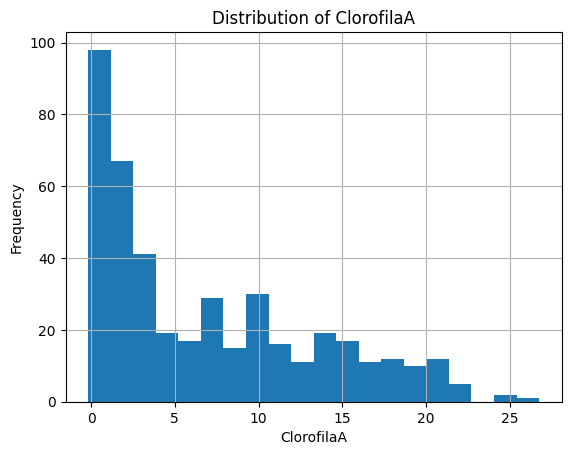

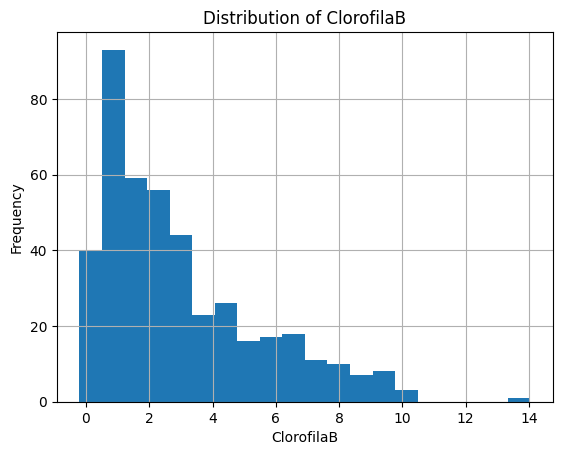

In [ ]:
display(df[['ClorofilaA', 'ClorofilaB']].describe())

df['ClorofilaA'].hist(bins=20)
plt.title('Distribution of ClorofilaA')
plt.xlabel('ClorofilaA')
plt.ylabel('Frequency')
plt.show()

df['ClorofilaB'].hist(bins=20)
plt.title('Distribution of ClorofilaB')
plt.xlabel('ClorofilaB')
plt.ylabel('Frequency')
plt.show()

## Visualización de la distribución de variables predictoras

### Subtask:
Crea histogramas o boxplots para entender la distribución de las columnas numéricas del `df` (excluyendo las clorofilas).


**Reasoning**:
Identify and plot the distribution of numerical columns excluding the target variables.



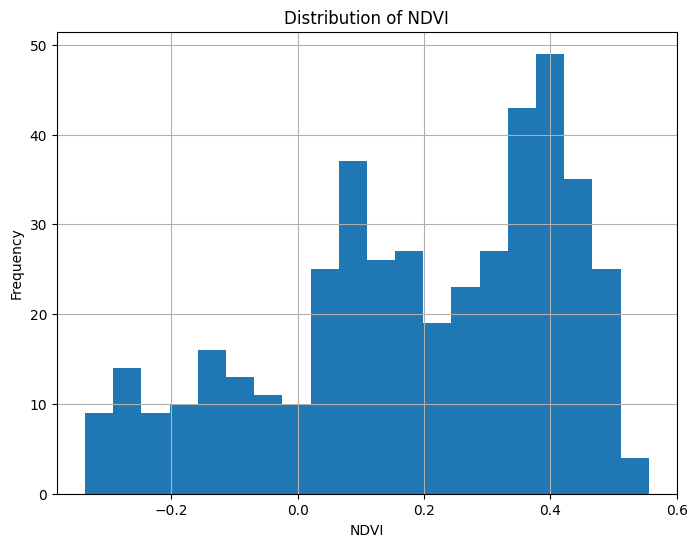

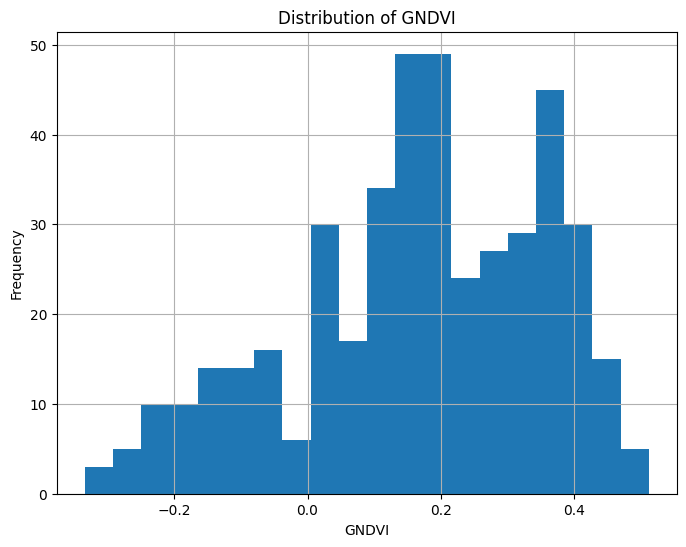

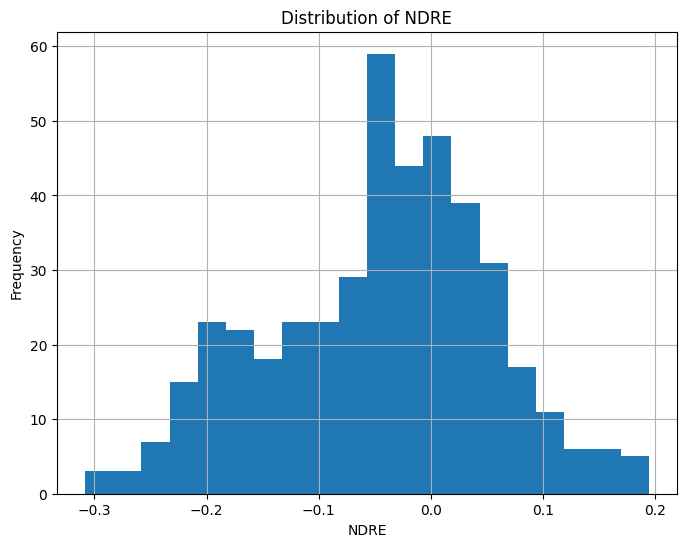

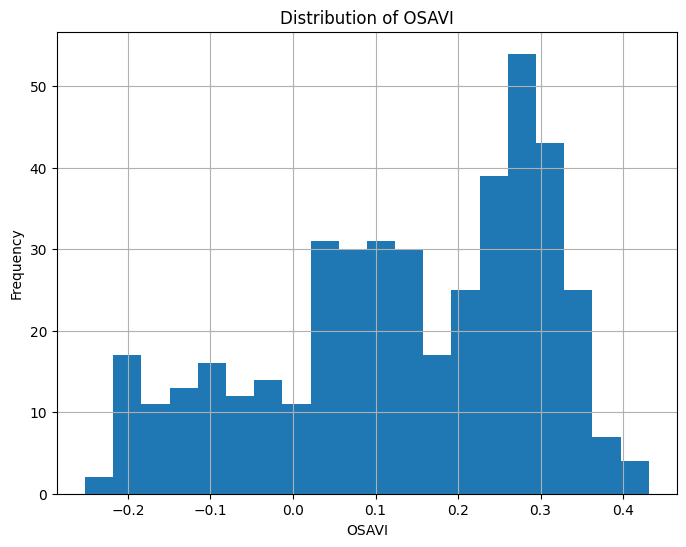

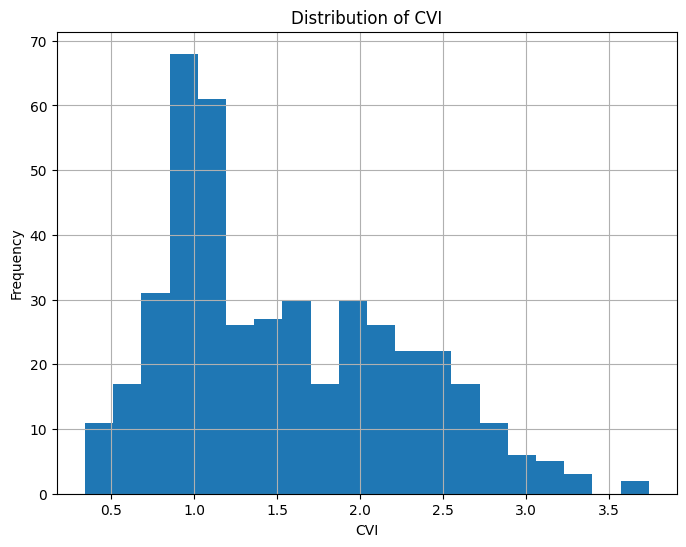

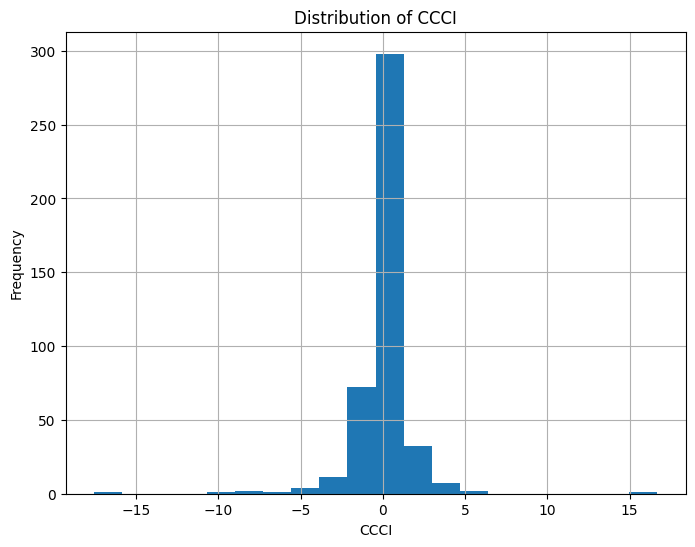

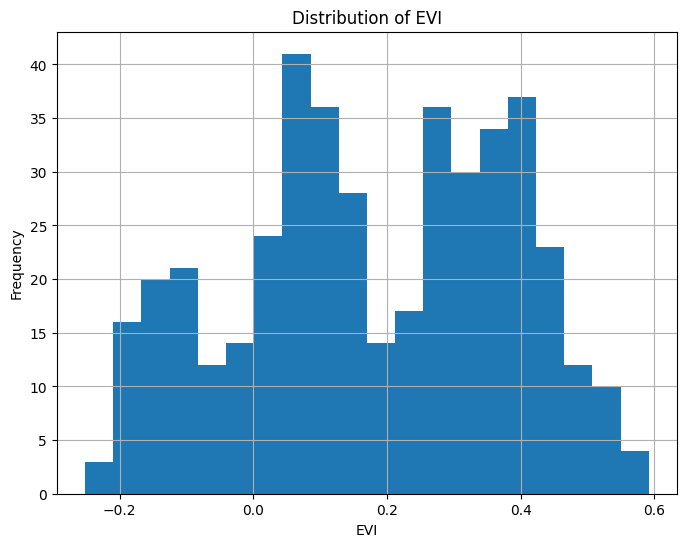

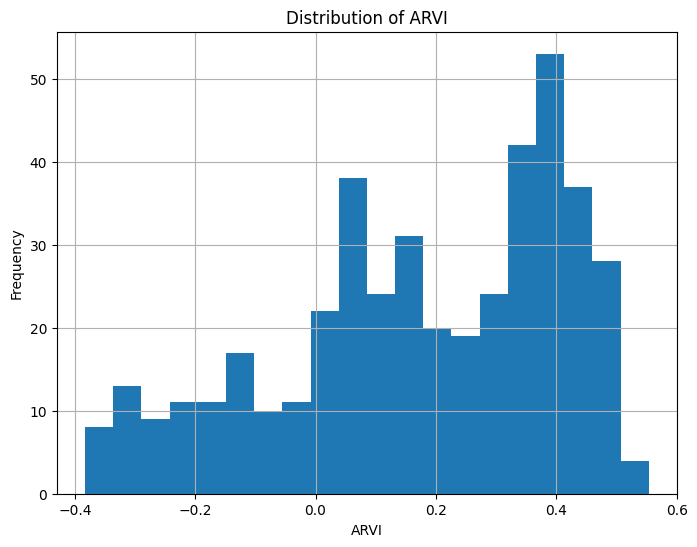

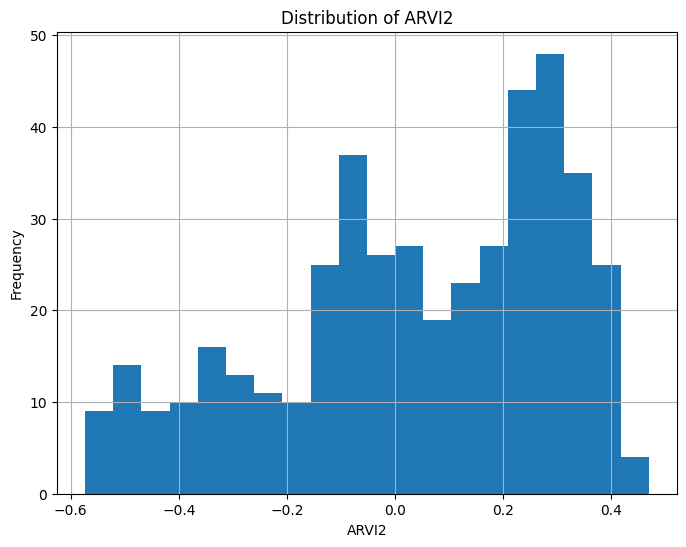

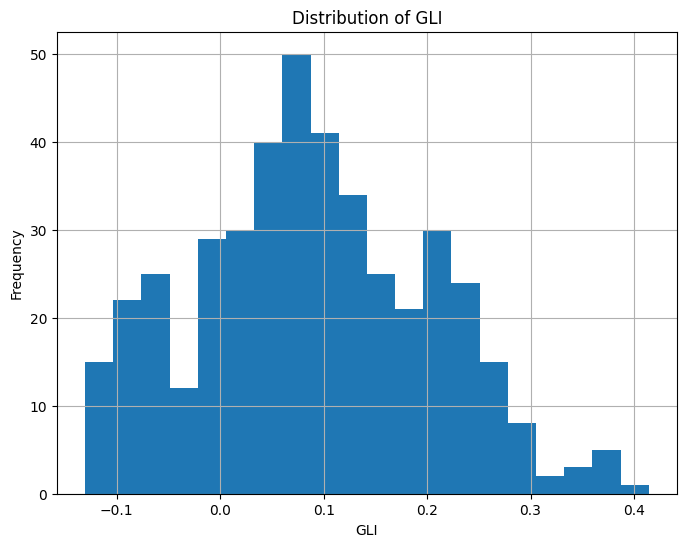

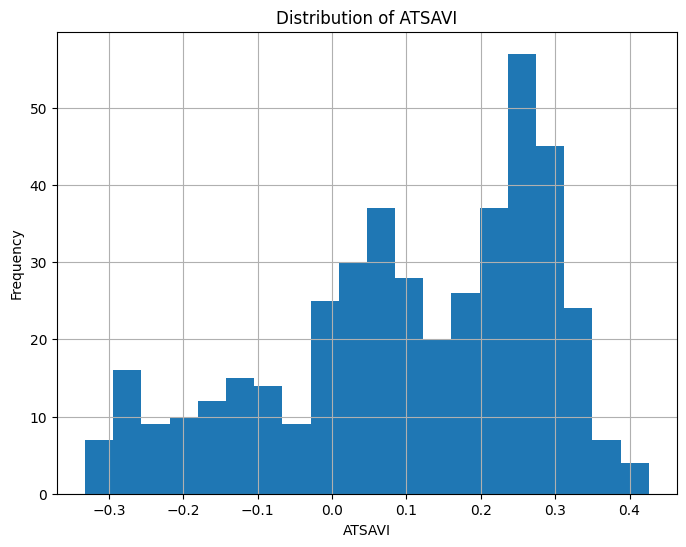

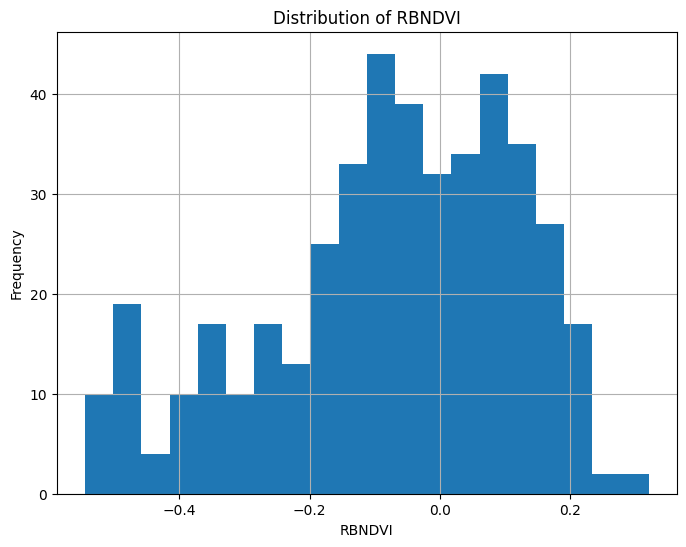

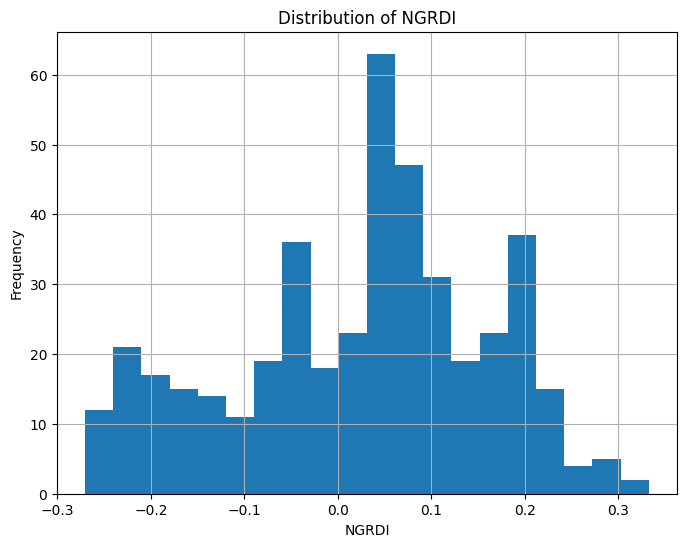

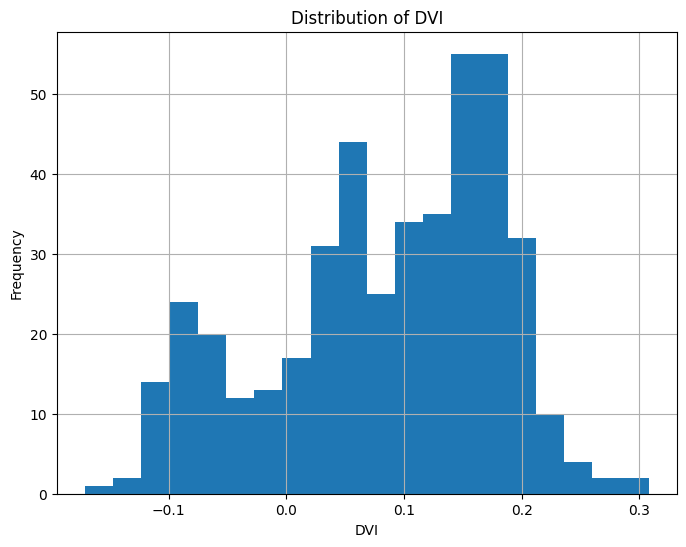

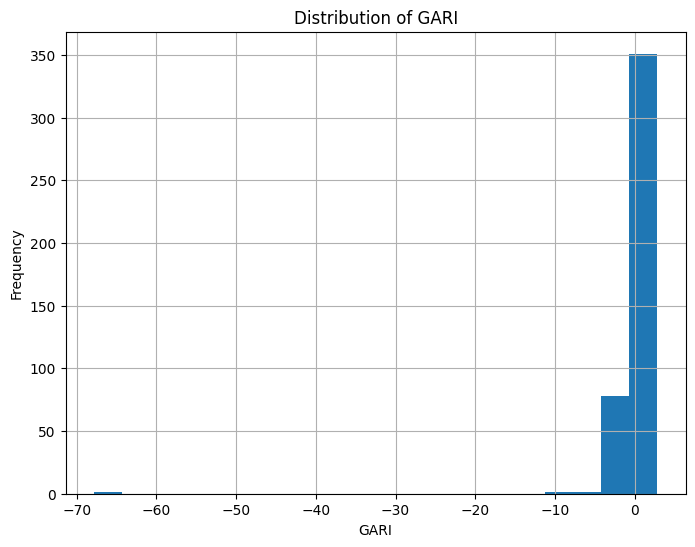

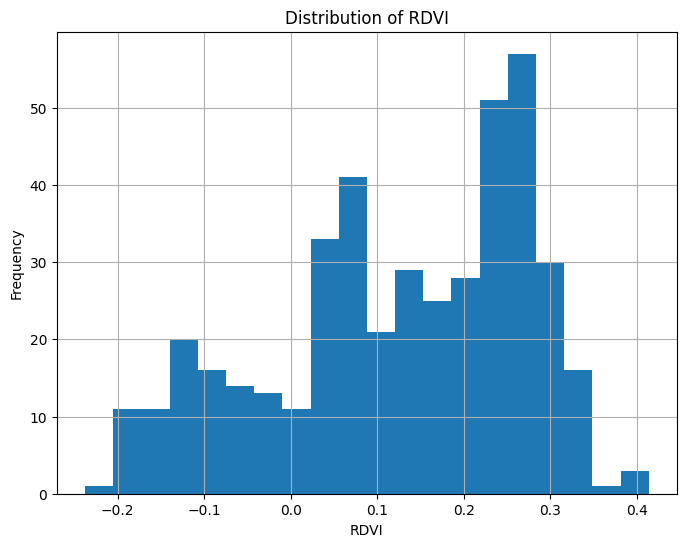

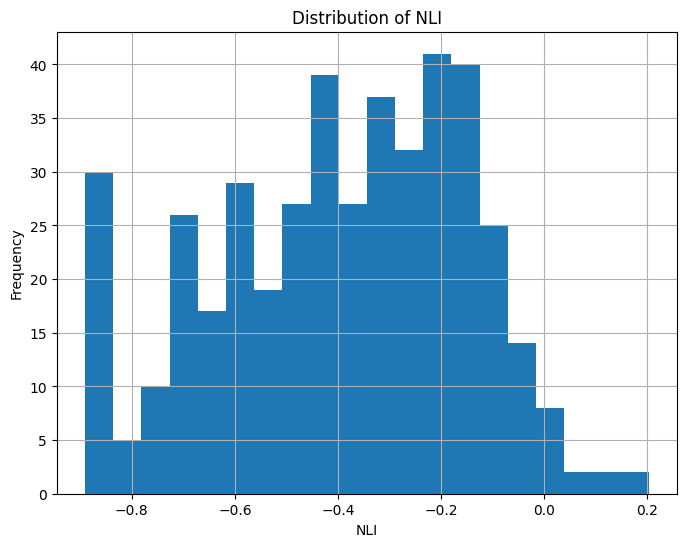

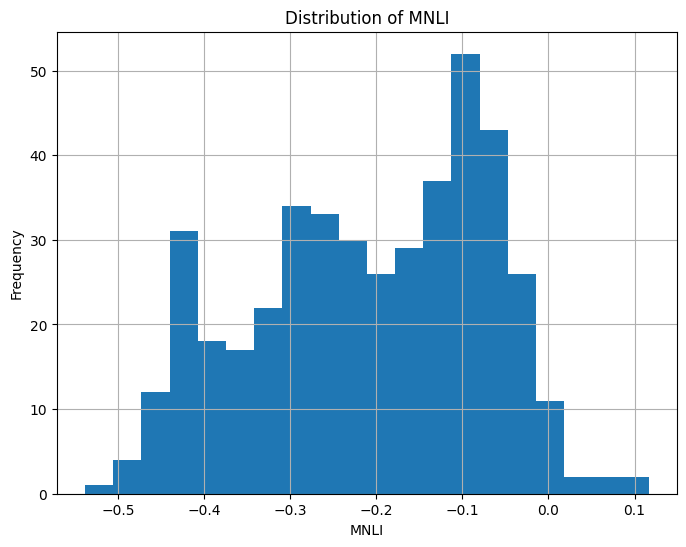

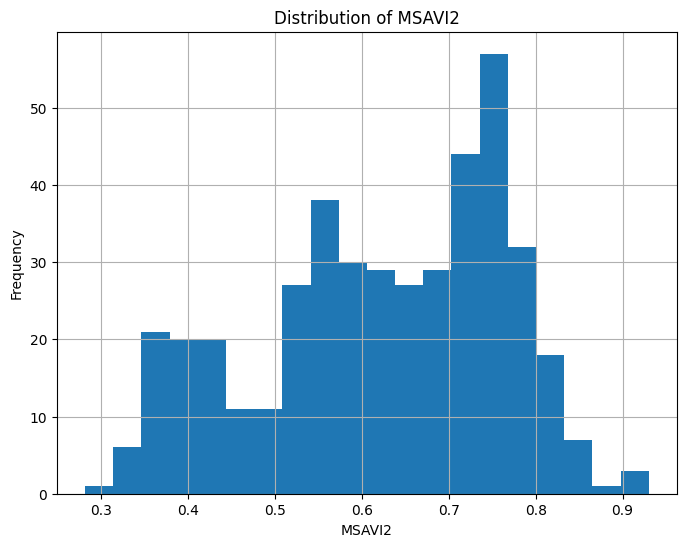

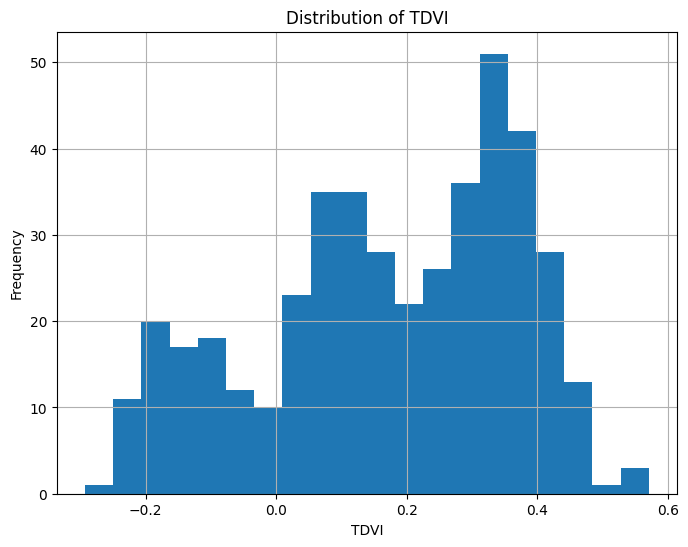

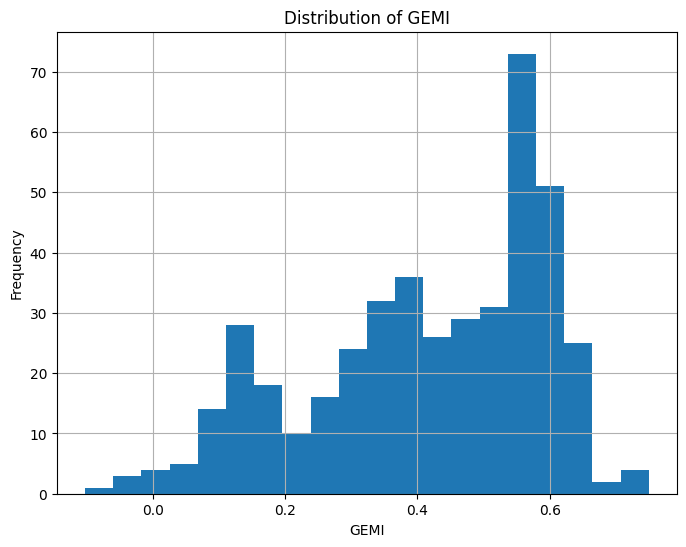

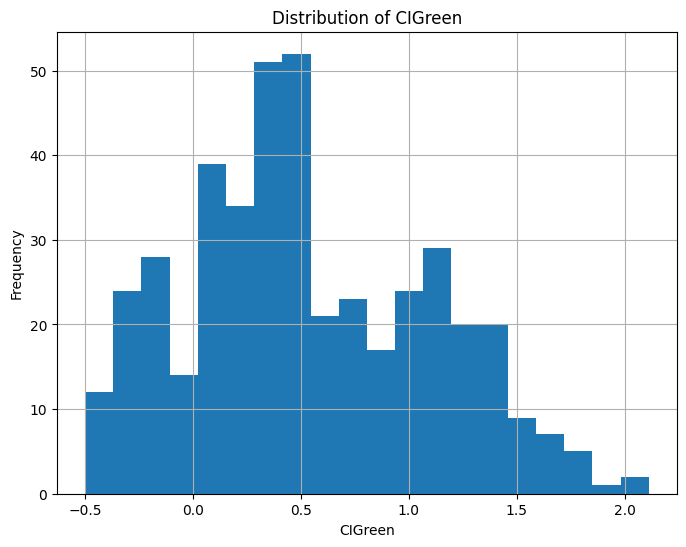

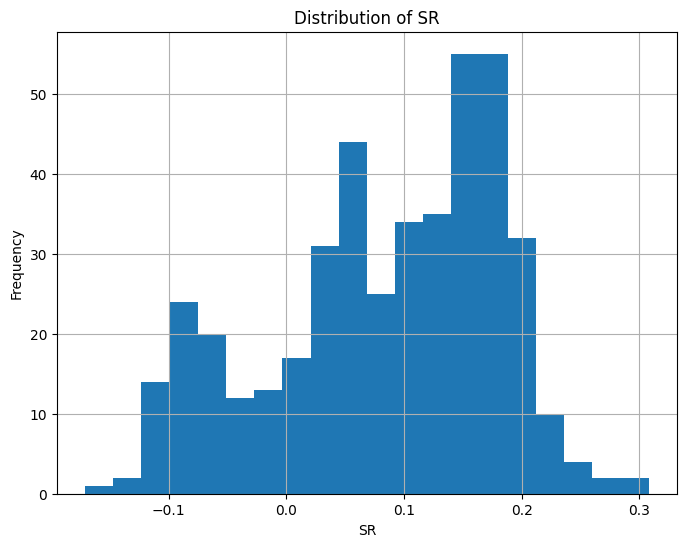

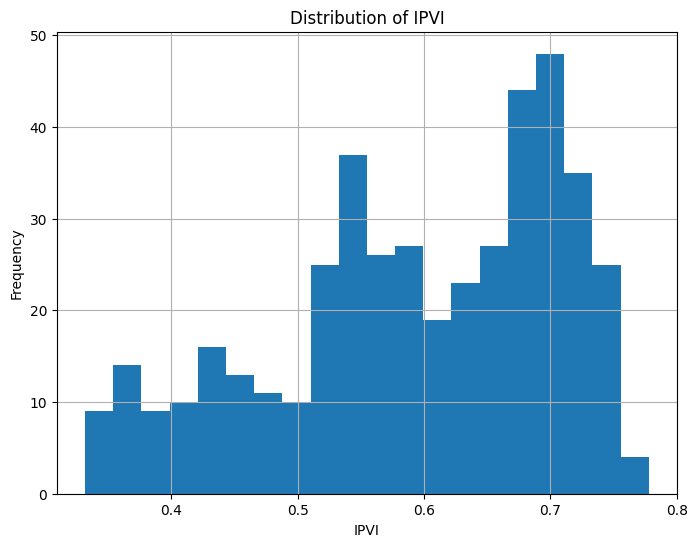

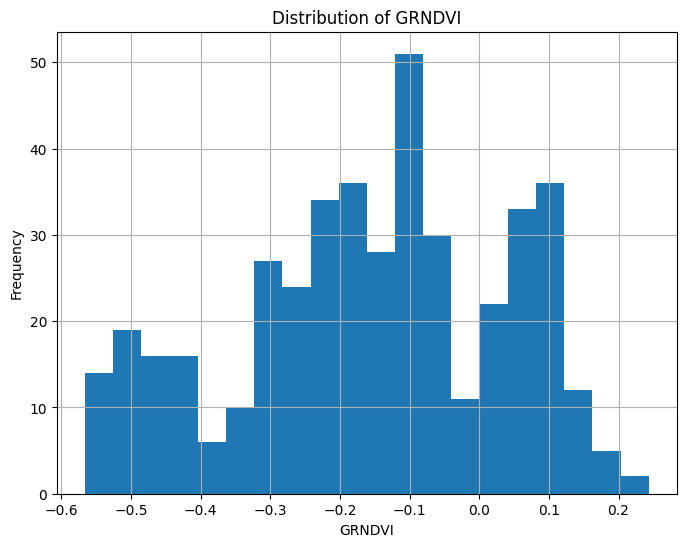

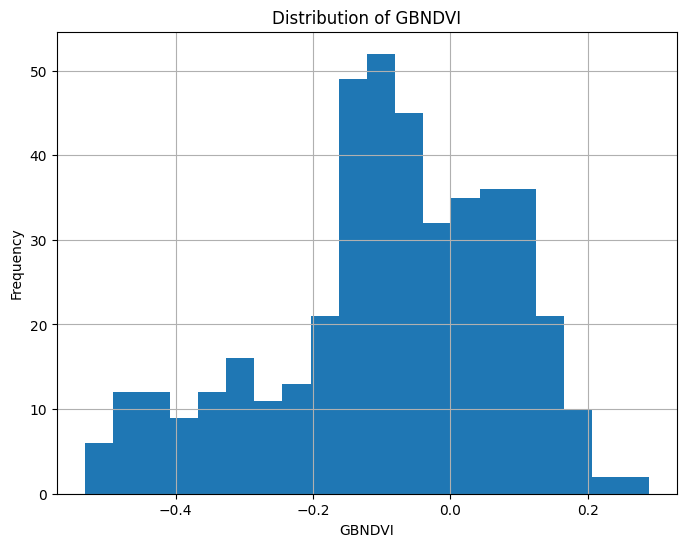

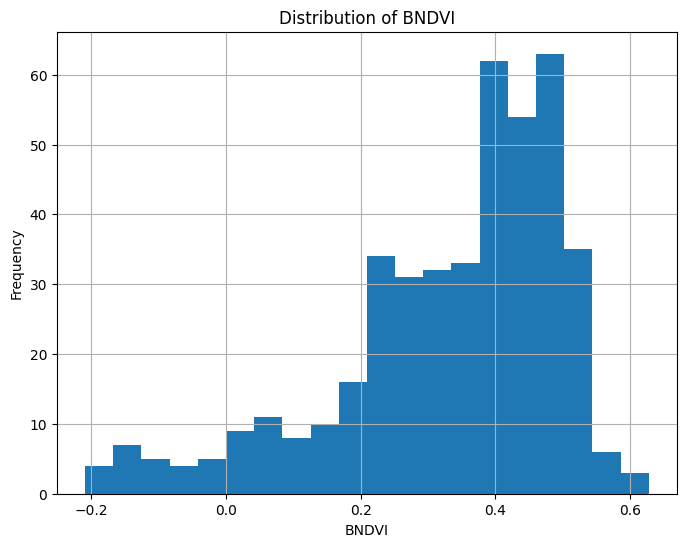

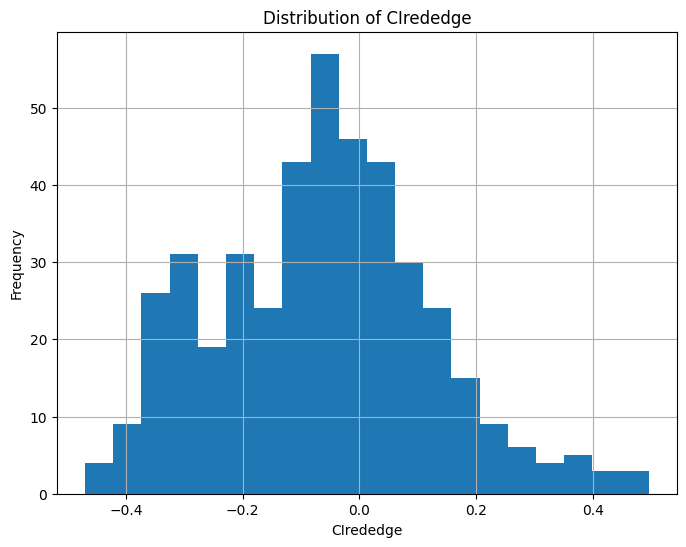

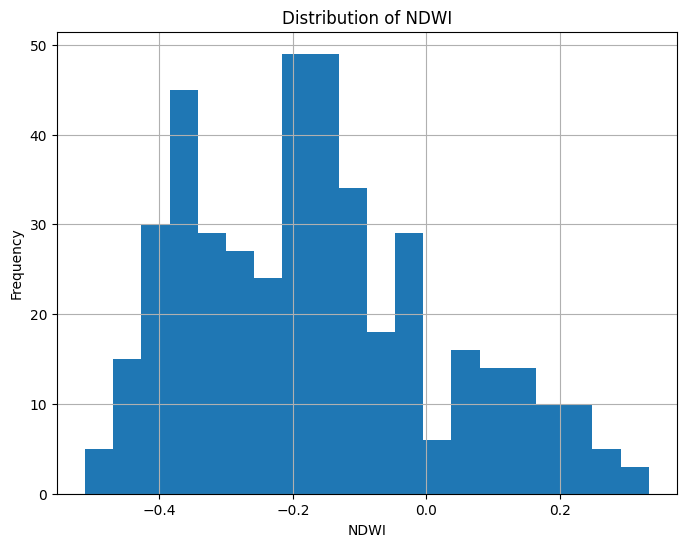

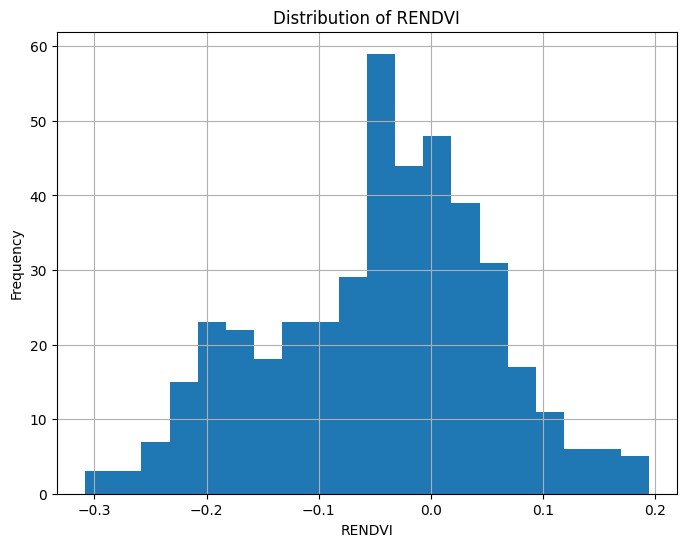

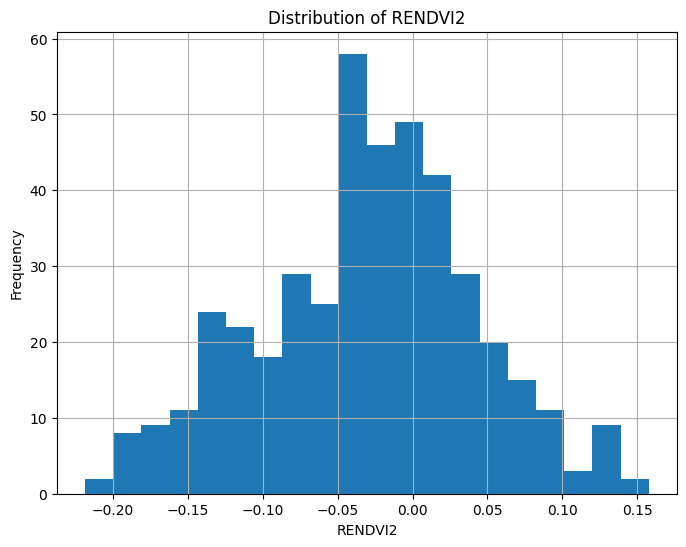

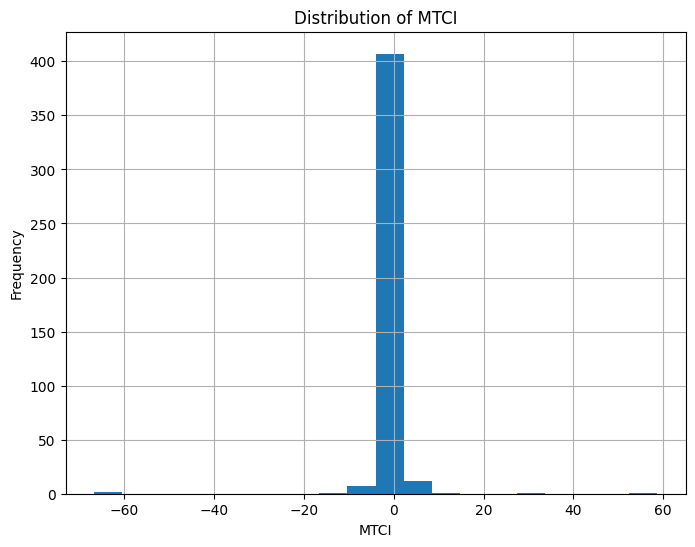

In [ ]:
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('ClorofilaA')
numerical_cols.remove('ClorofilaB')

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    df[col].hist(bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Análisis de correlación

### Subtask:
Calcula y visualiza la matriz de correlación entre las variables numéricas del `df`, prestando especial atención a la correlación con 'ClorofilaA' y 'ClorofilaB'.


**Reasoning**:
Select numerical columns, calculate the correlation matrix, and create a heatmap to visualize the correlations, especially with 'ClorofilaA' and 'ClorofilaB'.



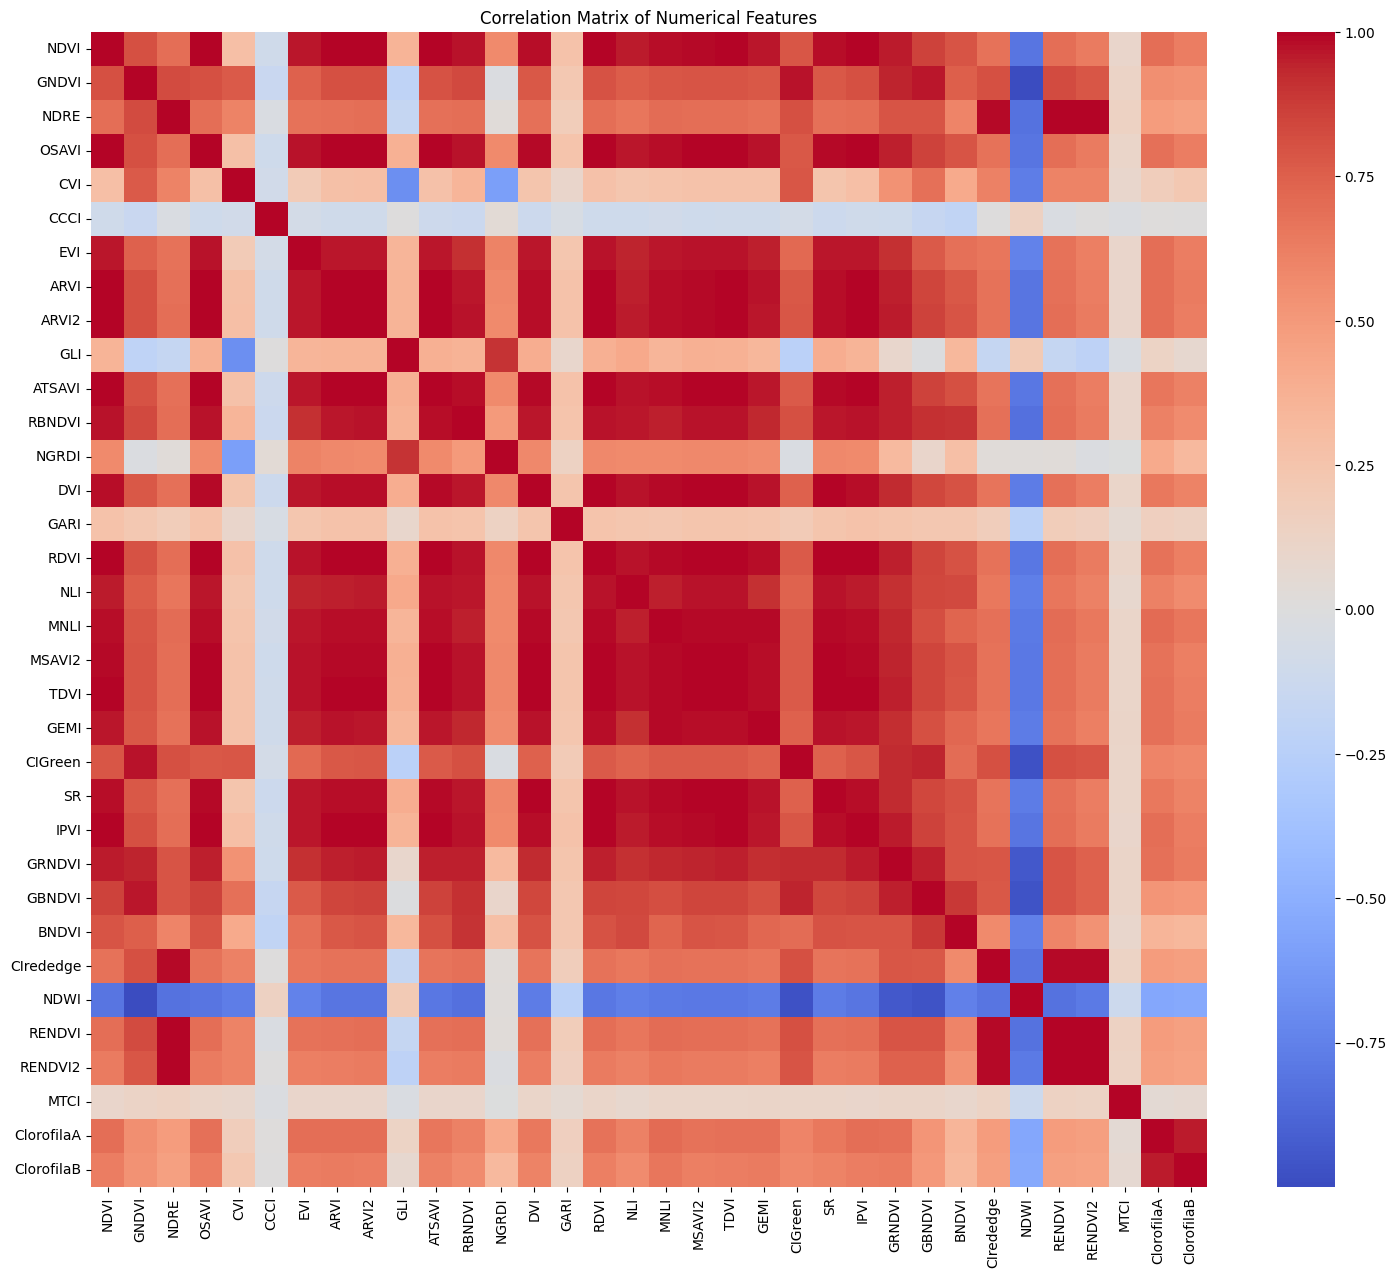

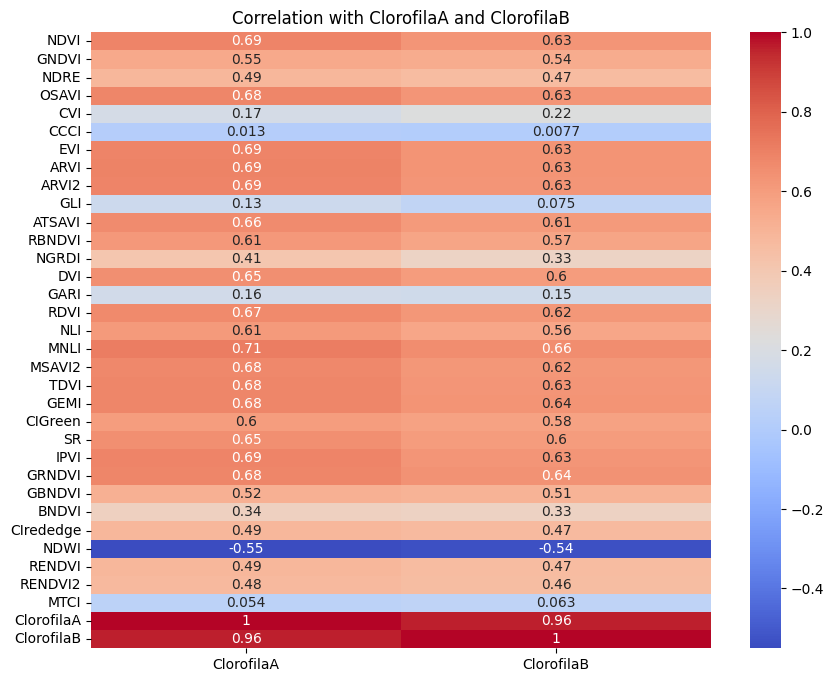

In [ ]:
import seaborn as sns

numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['ClorofilaA', 'ClorofilaB']], annot=True, cmap='coolwarm')
plt.title('Correlation with ClorofilaA and ClorofilaB')
plt.show()

## Análisis de la relación entre variables predictoras y variables objetivo

### Subtask:
Crea gráficos de dispersión u otros visualizaciones para explorar la relación entre las variables predictoras y 'ClorofilaA' y 'ClorofilaB'.


**Reasoning**:
Identify the numerical predictor columns by excluding 'ClorofilaA' and 'ClorofilaB', then iterate through these columns to create scatter plots against both 'ClorofilaA' and 'ClorofilaB' to visualize their relationships.



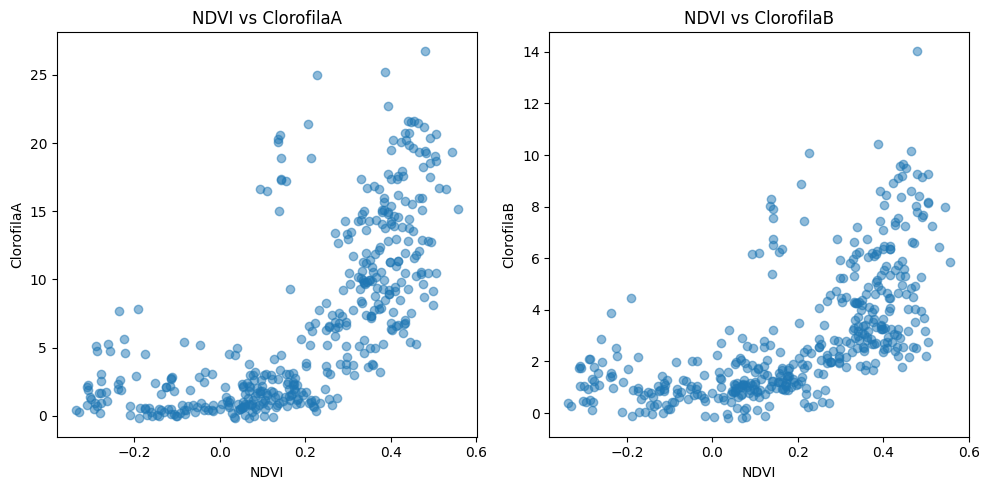

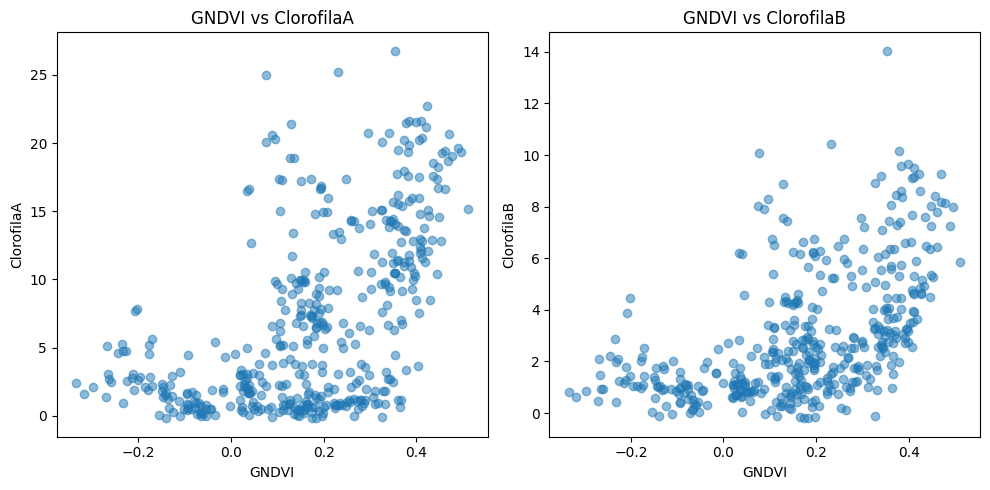

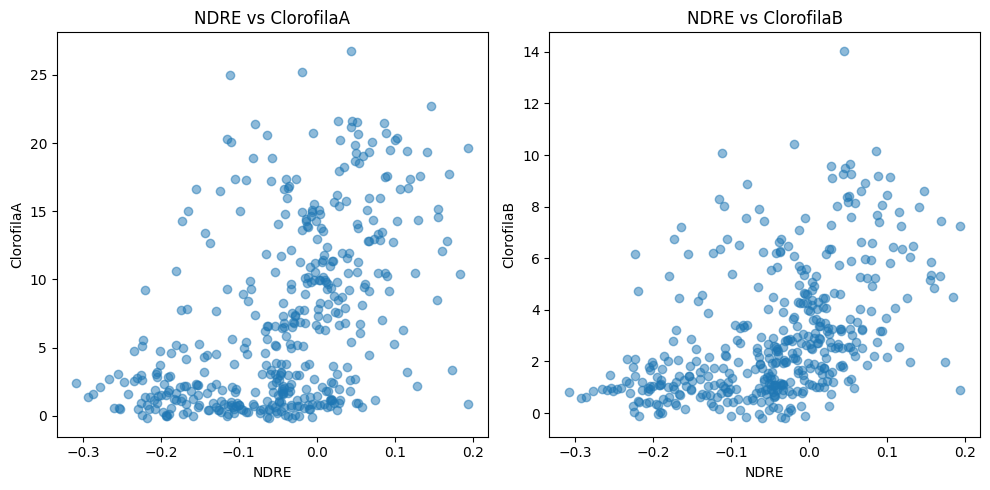

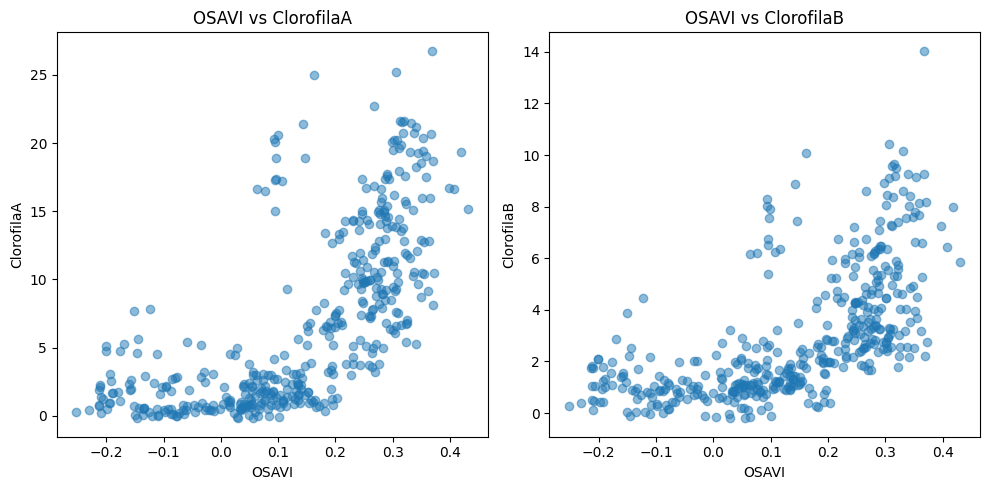

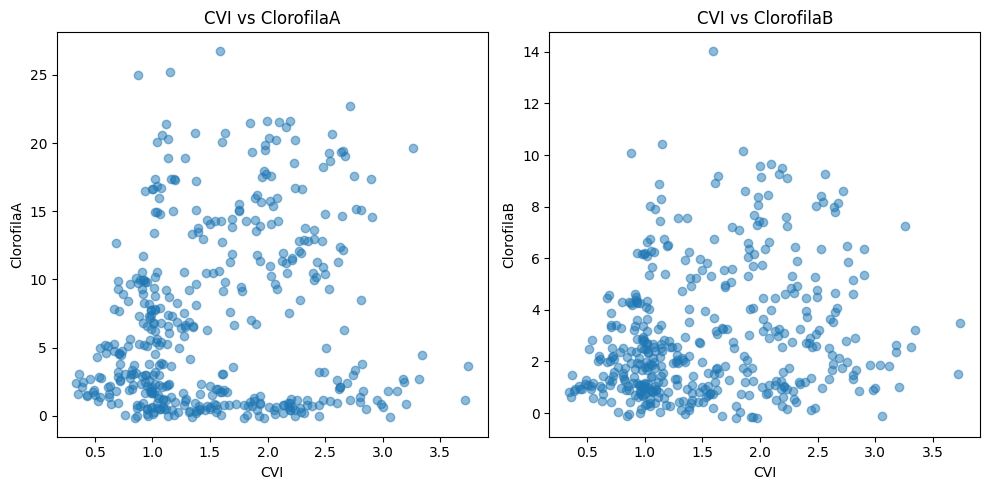

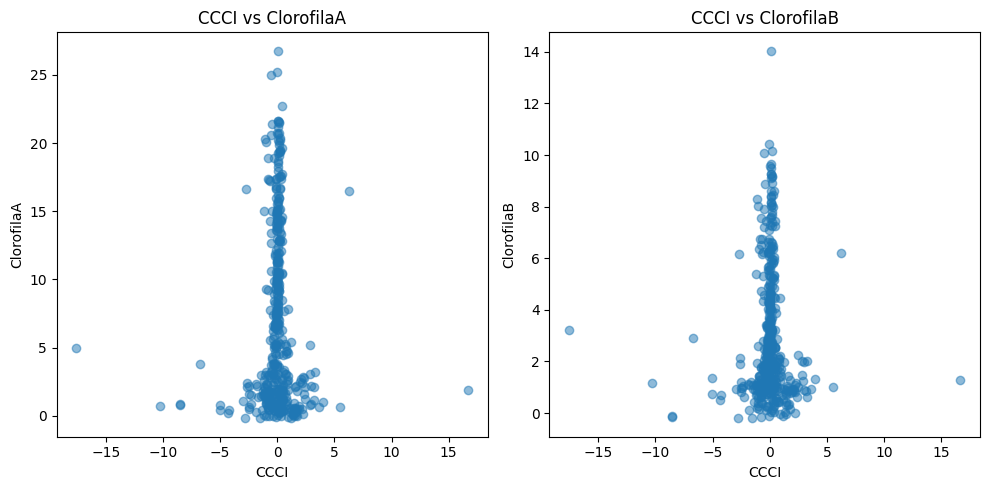

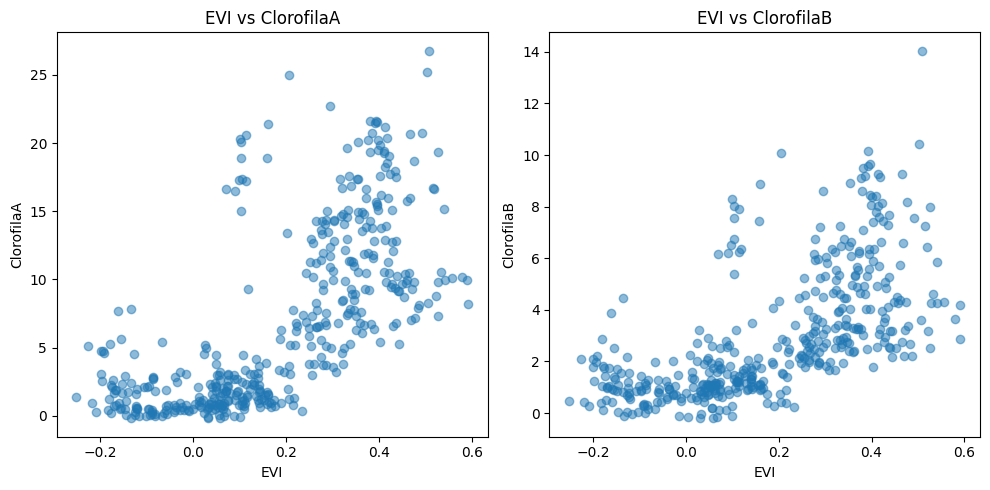

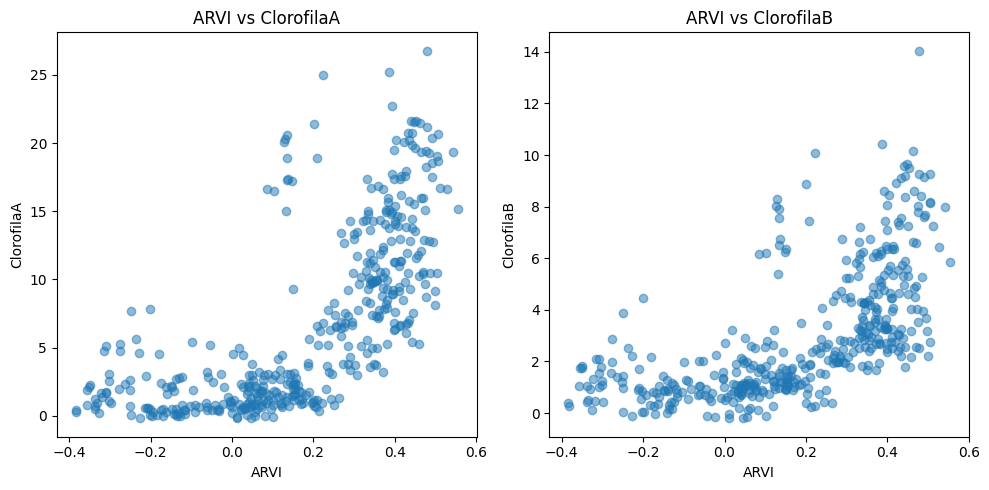

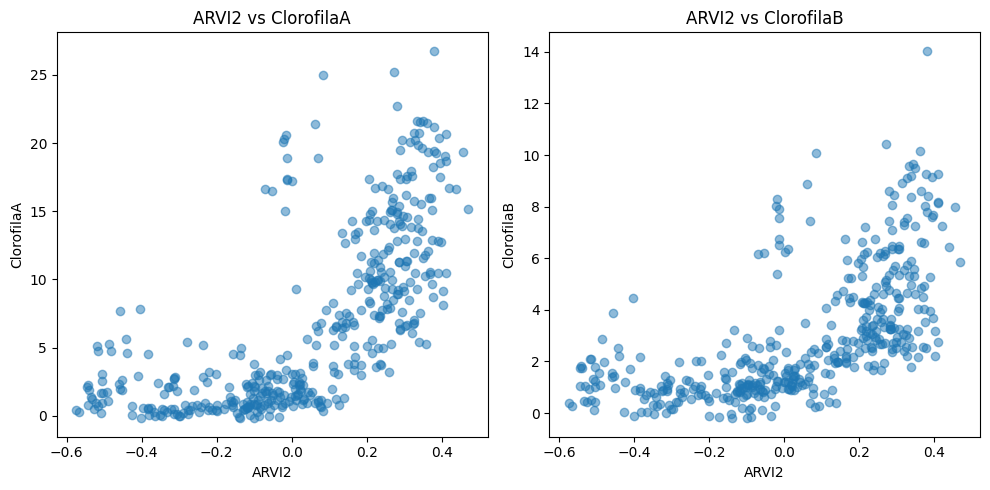

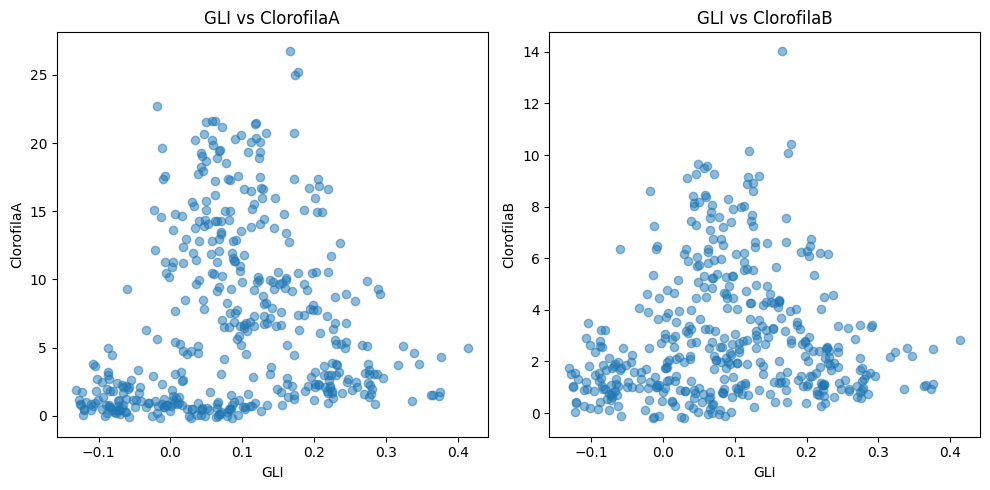

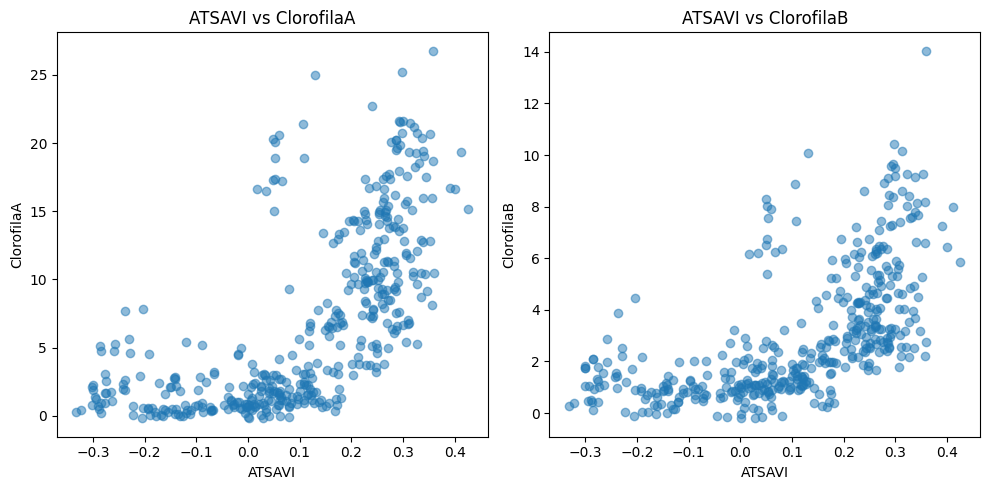

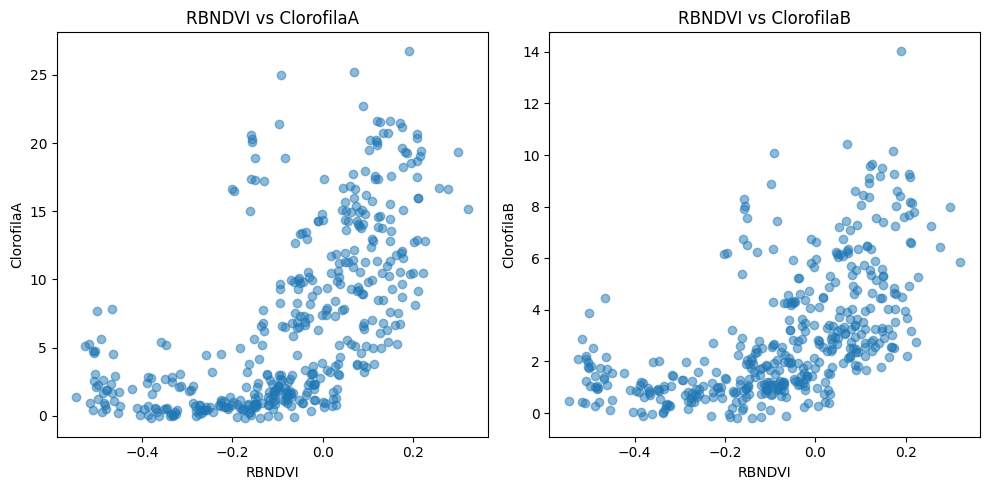

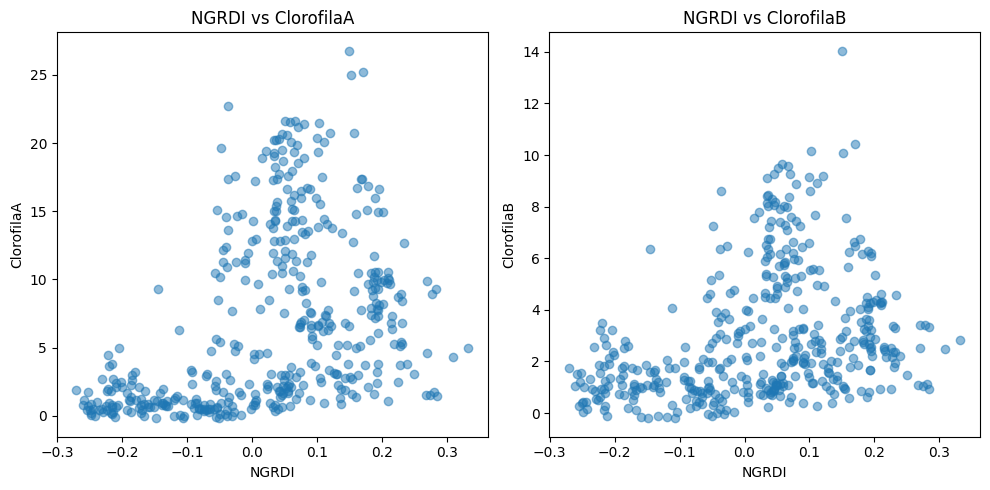

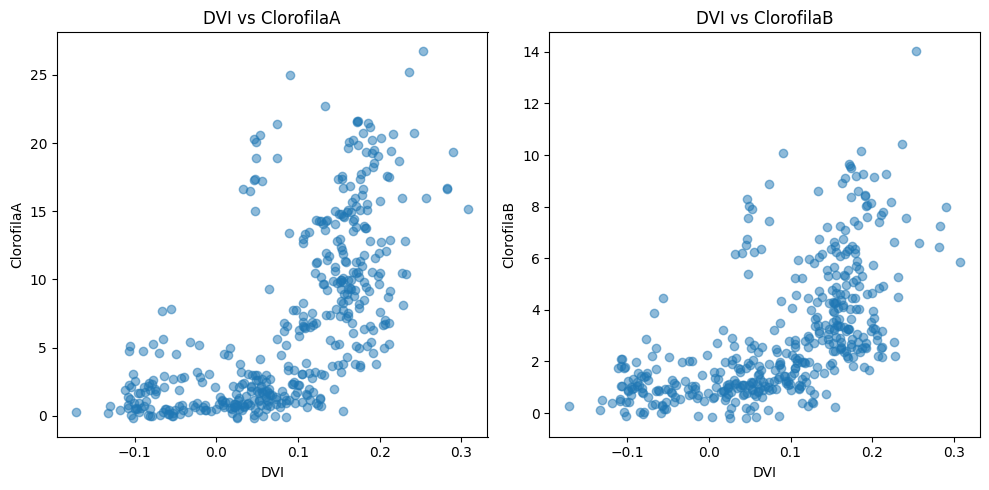

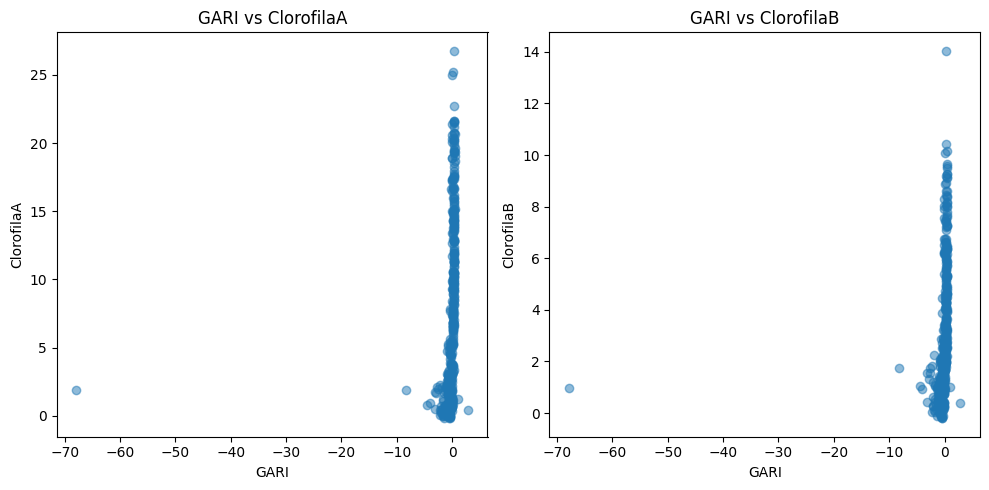

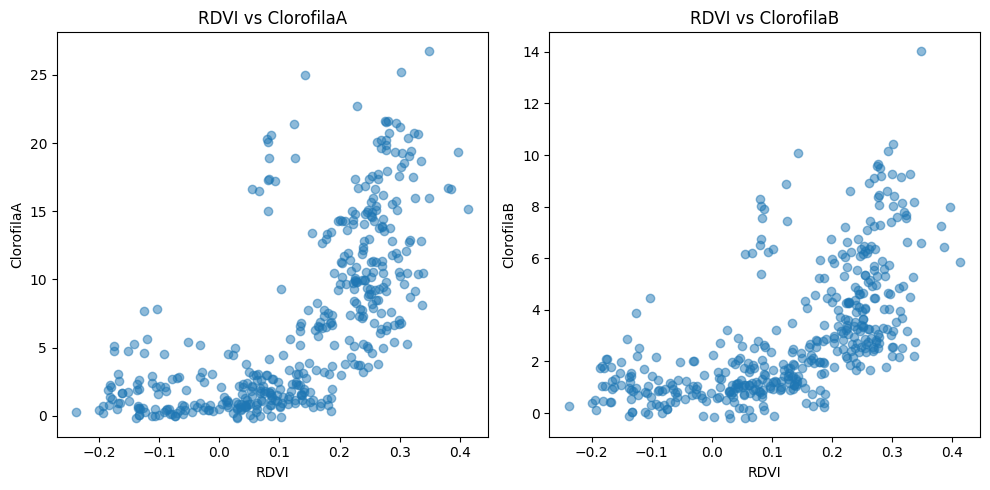

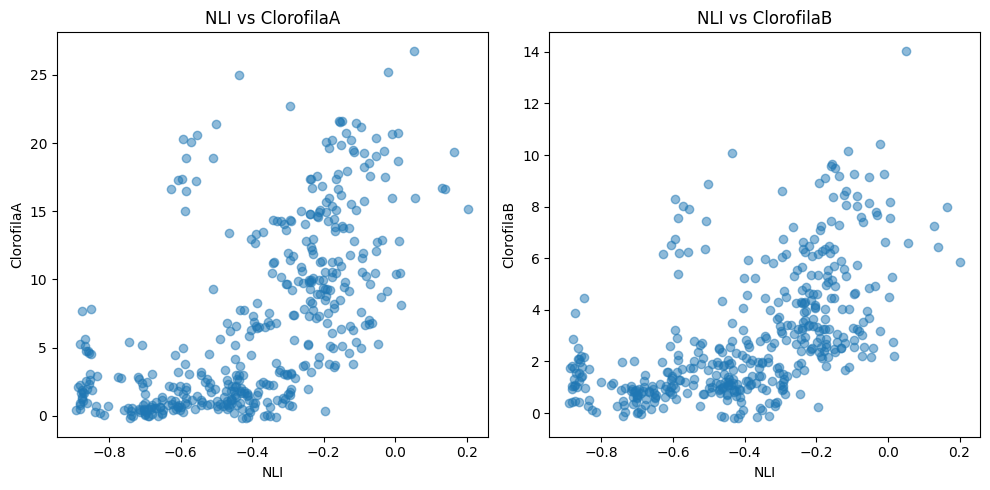

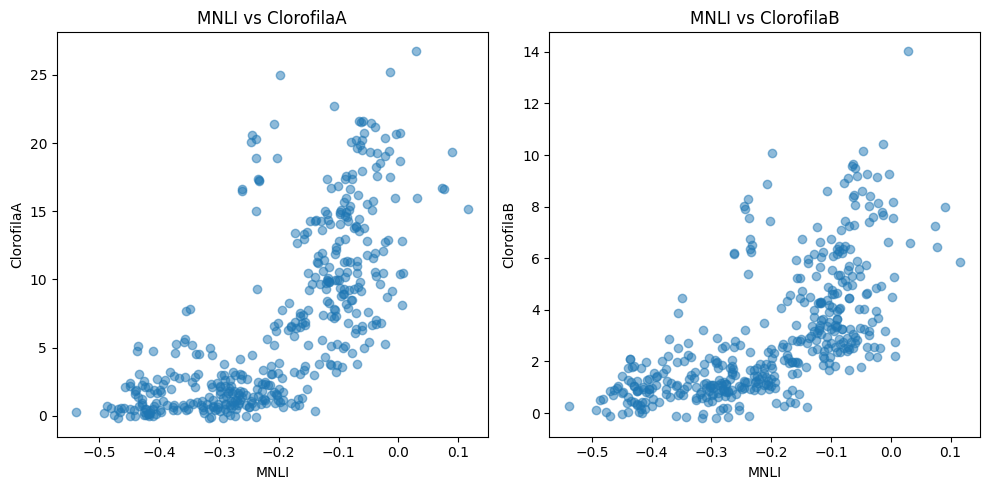

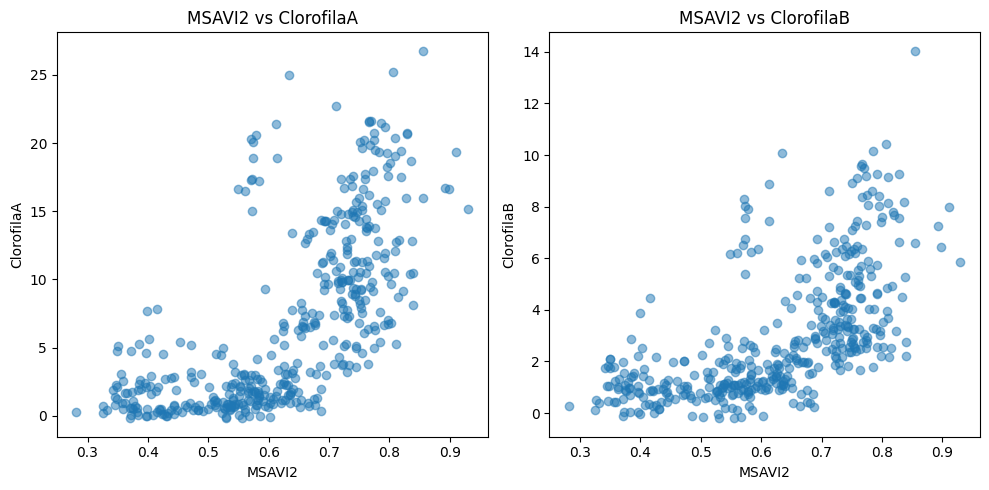

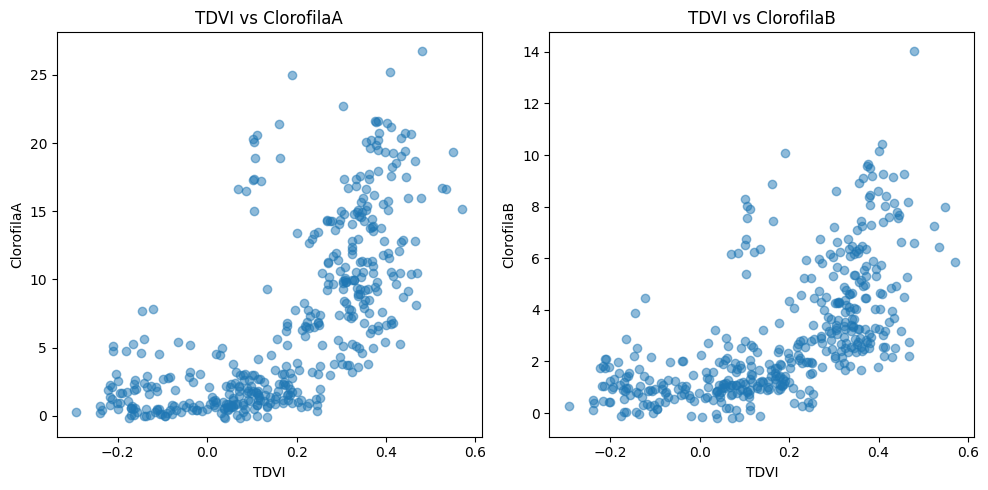

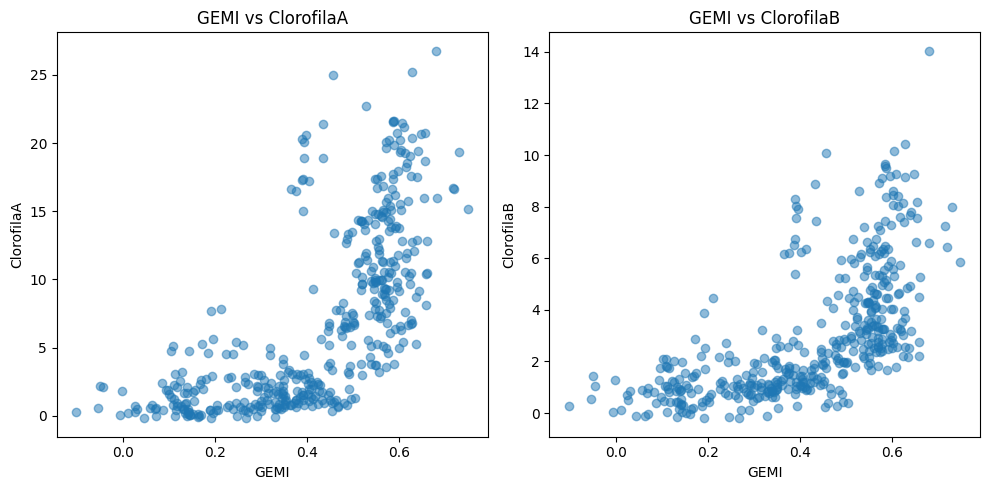

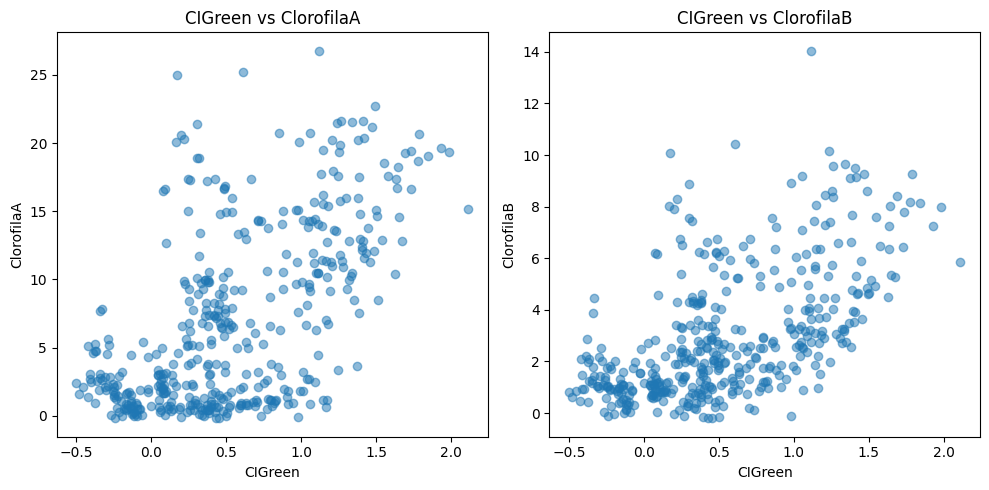

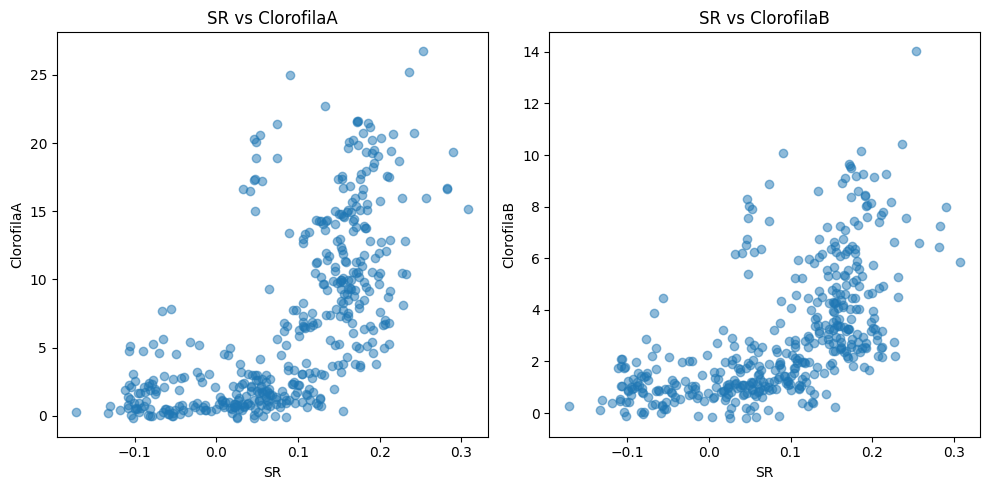

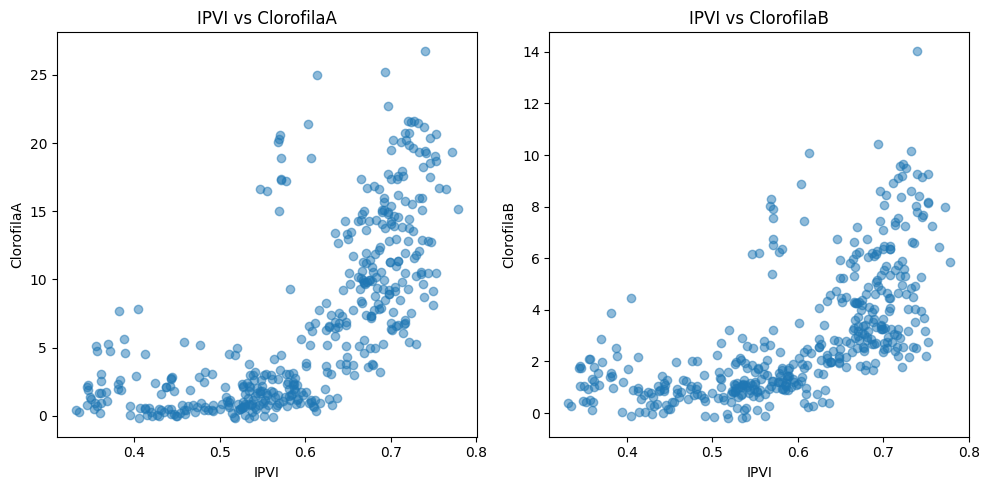

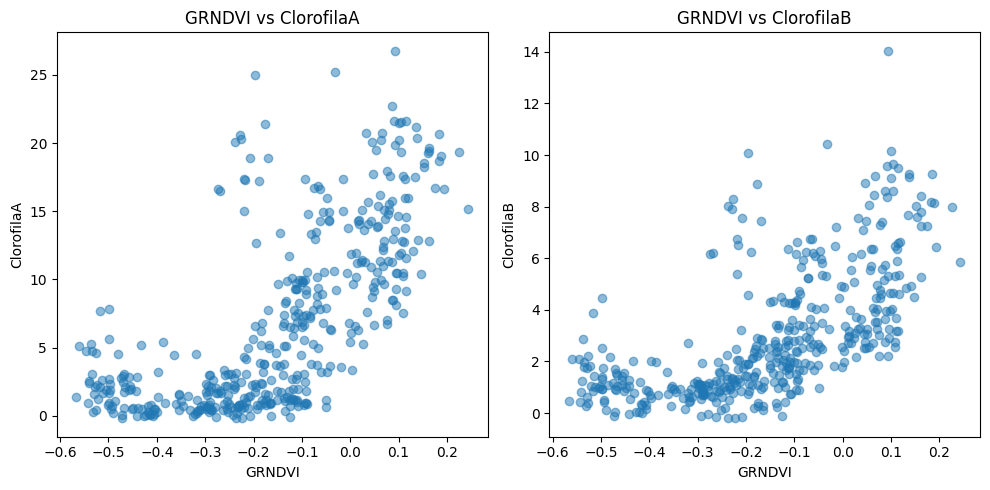

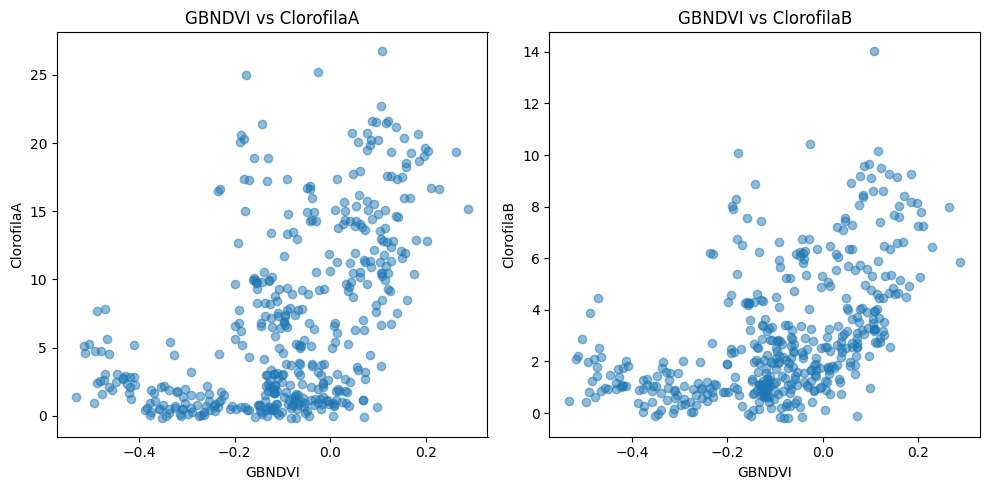

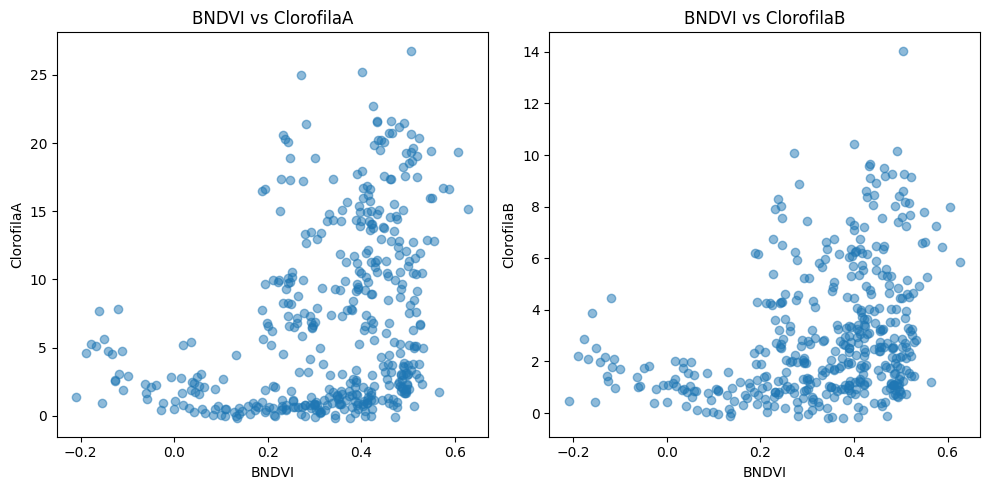

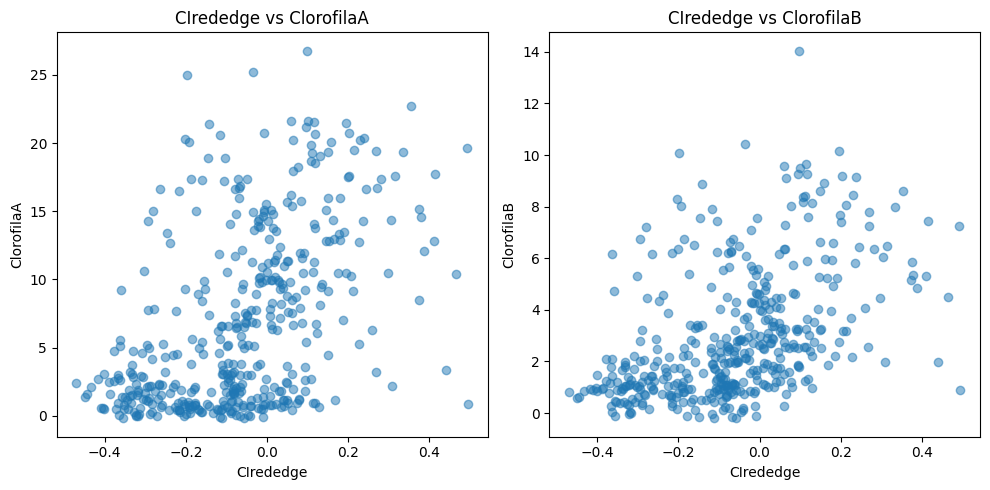

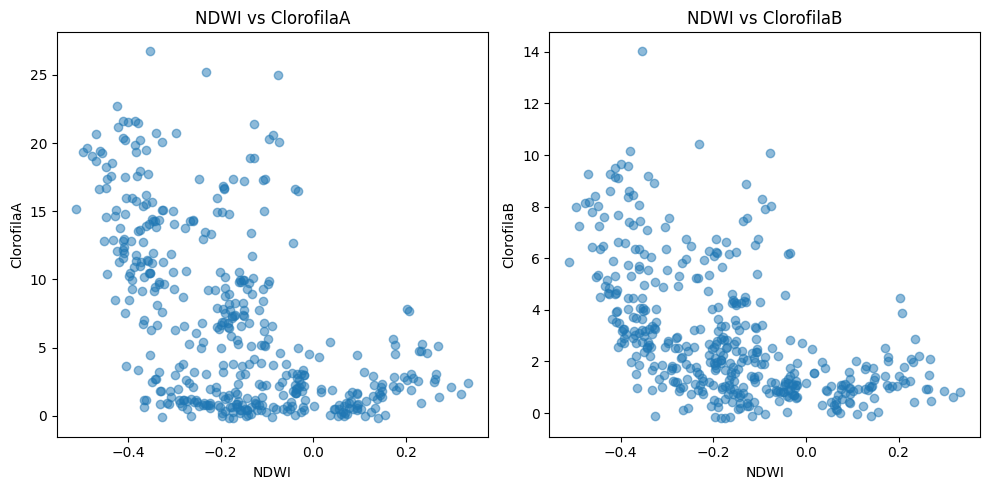

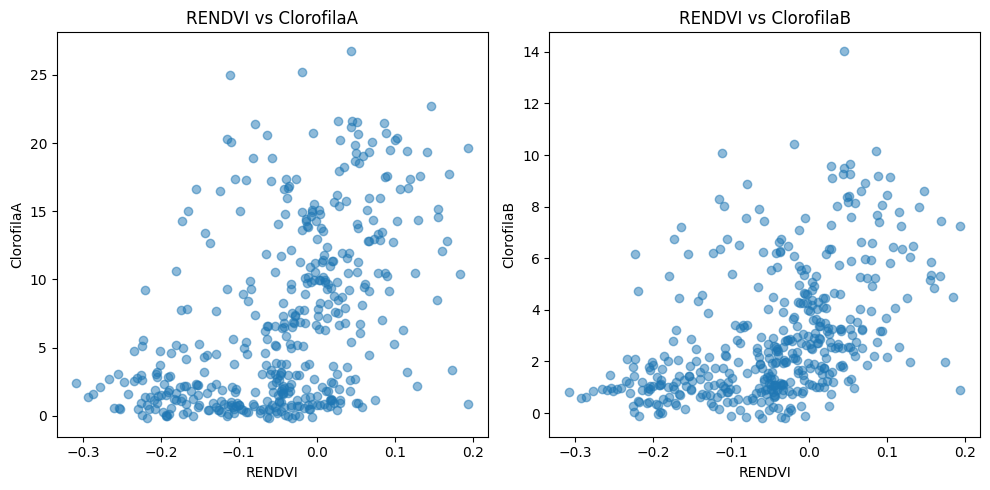

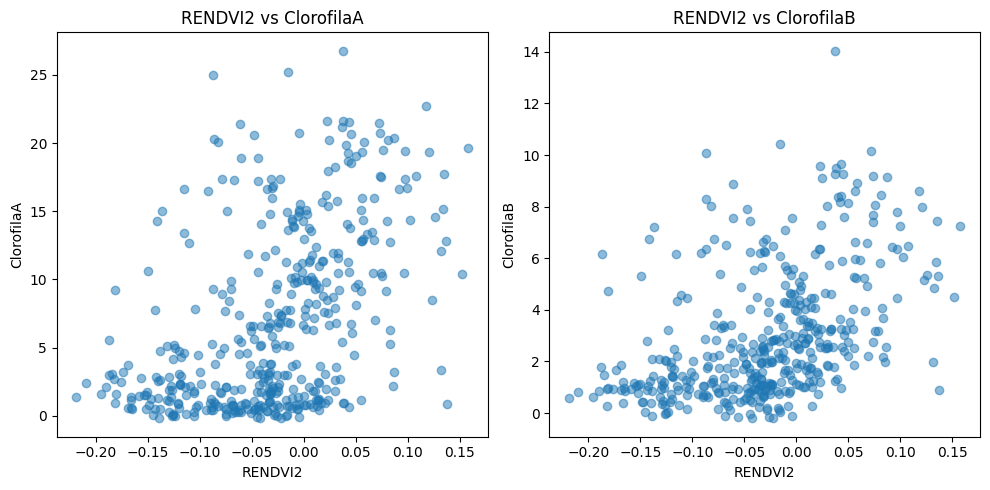

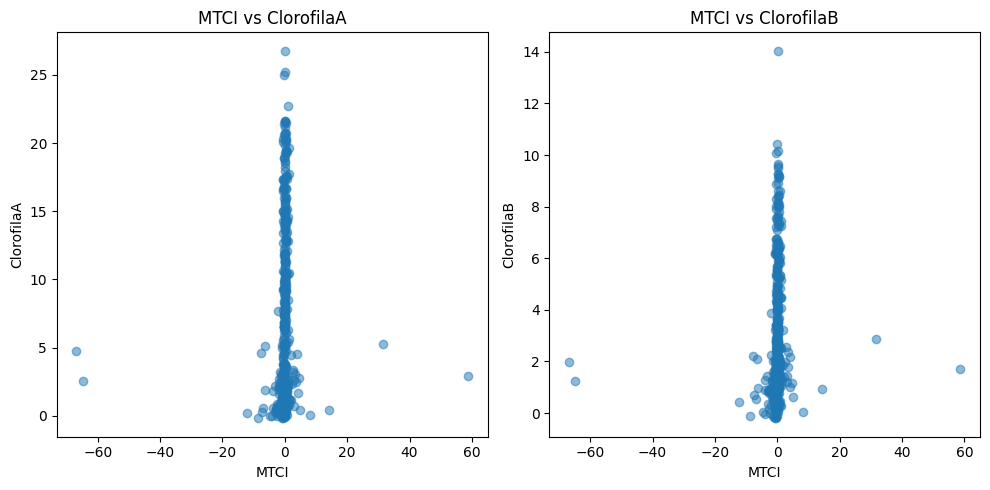

In [ ]:
predictor_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
predictor_cols.remove('ClorofilaA')
predictor_cols.remove('ClorofilaB')

for col in predictor_cols:
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(df[col], df['ClorofilaA'], alpha=0.5)
    plt.title(f'{col} vs ClorofilaA')
    plt.xlabel(col)
    plt.ylabel('ClorofilaA')

    plt.subplot(1, 2, 2)
    plt.scatter(df[col], df['ClorofilaB'], alpha=0.5)
    plt.title(f'{col} vs ClorofilaB')
    plt.xlabel(col)
    plt.ylabel('ClorofilaB')

    plt.tight_layout()
    plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset `df` contains no missing values in any of its columns.
*   The distribution of 'ClorofilaA' and 'ClorofilaB' is skewed to the right, with most values concentrated in the lower range.
*   'ClorofilaA' has a mean of approximately 6.95 and a median of 4.86, with values ranging from -0.17 to 26.76.
*   'ClorofilaB' has a mean of approximately 2.97 and a median of 2.20, with values ranging from -0.21 to 14.04.
*   Slightly negative minimum values were observed in both 'ClorofilaA' and 'ClorofilaB'.
*   Histograms were generated for all numerical predictor variables to visualize their distributions.
*   Heatmaps were created to visualize the correlation matrix of all numerical features and specifically the correlations with 'ClorofilaA' and 'ClorofilaB'.
*   Scatter plots were generated for each numerical predictor variable against 'ClorofilaA' and 'ClorofilaB' to explore their relationships.

### Insights or Next Steps

*   Investigate the slightly negative values in 'ClorofilaA' and 'ClorofilaB' to determine if they are errors or valid measurements.
*   Analyze the generated heatmaps and scatter plots to identify potential predictor variables with strong correlations or clear relationships with 'ClorofilaA' and 'ClorofilaB' for subsequent modeling.


## Resumen del Análisis Exploratorio de Datos (EDA)

Aquí tienes un resumen de los hallazgos clave de nuestro EDA en el dataframe `df`, con un enfoque en la estimación de la Clorofila A y Clorofila B:

### Hallazgos Clave del Análisis de Datos

*   El dataframe `df` no contiene valores faltantes en ninguna columna, lo cual simplifica el proceso de preprocesamiento.
*   La distribución de 'ClorofilaA' y 'ClorofilaB' muestra un sesgo positivo, concentrándose la mayoría de los valores en el rango inferior. Se observaron valores mínimos ligeramente negativos en ambas columnas, lo cual podría requerir una investigación adicional para determinar si son mediciones válidas o errores.
*   Los histogramas de las variables predictoras numéricas revelan diversas distribuciones, algunas cercanas a la normal y otras sesgadas.
*   El análisis de correlación mostró la relación lineal entre todos los índices numéricos y, específicamente, con 'ClorofilaA' y 'ClorofilaB'. Se identificaron índices con correlaciones fuertes, tanto positivas como negativas, con las variables objetivo. También se observó la multicolinealidad entre algunos índices predictoras.
*   Los gráficos de dispersión proporcionaron una visualización de las relaciones entre cada índice predictor y las clorofilas, permitiendo identificar posibles relaciones no lineales o patrones.
*   Los modelos de Regresión Lineal Múltiple para 'ClorofilaA' y 'ClorofilaB' nos dieron información sobre la significancia lineal de cada índice a través de los p-valores:
    *   **Para ClorofilaA:** Índices con p-valores bajos (estadísticamente significativos) en el modelo lineal sugieren una relación lineal notable. (Revisar el resumen del modelo para los índices específicos).
    *   **Para ClorofilaB:** Similarmente, los índices con p-valores bajos para ClorofilaB indican una relación lineal significativa con esta variable. (Revisar el resumen del modelo para los índices específicos).

### Implicaciones para la Selección de Características para tu Modelo MLP

Basado en este EDA, aquí tienes algunas implicaciones para seleccionar los índices para tu modelo MLP:

*   **Prioriza índices con relaciones fuertes:** Considera fuertemente los índices que mostraron alta correlación (tanto en el heatmap como en los valores de correlación con ClorofilaA y ClorofilaB) y aquellos con p-valores bajos en la RLM. Estos tienen una relación lineal significativa con las variables objetivo.
*   **No descartes variables con p-valores altos prematuramente:** Recuerda que la MLP puede capturar relaciones no lineales e interacciones. Un índice con un p-valor alto en la RLM (que solo evalúa relaciones lineales) aún podría ser útil en tu modelo MLP si tiene una relación no lineal o contribuye en combinación con otras variables. Revisa los gráficos de dispersión para buscar patrones no lineales.
*   **Considera la Multicolinealidad:** Si varios índices altamente correlacionados entre sí tienen p-valores bajos, podrías considerar seleccionar solo uno o un subconjunto de ellos para evitar problemas de multicolinealidad en el modelo lineal (aunque la MLP es menos sensible, puede seguir siendo una buena práctica).
*   **Utiliza el conocimiento del dominio:** Si conoces la relevancia agronómica de ciertos índices para la estimación de clorofila, úsalo como guía adicional en tu selección.

En resumen, utiliza los resultados de correlación, los gráficos de dispersión y los p-valores de la RLM como herramientas para informar tu selección inicial de características. Puedes empezar con un subconjunto de los índices más prometedores y luego iterar si es necesario.

### Próximos Pasos

Ahora que tienes una comprensión más profunda de tus datos y la relación entre los índices y la clorofila, los próximos pasos lógicos serían:

1.  **Preprocesamiento de Datos (si es necesario):** Abordar los valores mínimos ligeramente negativos en las clorofilas si determinas que son errores. Considerar la estandarización o normalización de los índices si tu MLP lo requiere.
2.  **Selección Final de Características:** Basándote en el EDA y tus criterios, define el conjunto final de índices que usarás como variables de entrada para tu MLP.
3.  **División de Datos:** Divide tu dataframe en conjuntos de entrenamiento, validación y prueba.
4.  **Construcción y Entrenamiento del Modelo MLP:** Define la arquitectura de tu red neuronal y entrénala con los datos preparados.
5.  **Evaluación del Modelo:** Evalúa el rendimiento de tu MLP en los conjuntos de validación y prueba utilizando métricas adecuadas (RMSE, MAE, R²).
6.  **Ajuste del Modelo y Optimización:** Si es necesario, ajusta los hiperparámetros de tu MLP o refina tu selección de características para mejorar el rendimiento.

## Análisis de la variable 'cultivo' y su relación con las clorofilas

### Subtask:
Explora cómo varían los valores de 'ClorofilaA' y 'ClorofilaB' entre los diferentes tipos de cultivo, utilizando visualizaciones como boxplots o gráficos de barras agrupadas.


**Reasoning**:
Generate boxplots for 'ClorofilaA' and 'ClorofilaB' grouped by 'CULTIVO' to visualize the distribution of chlorophyll levels across different crop types.



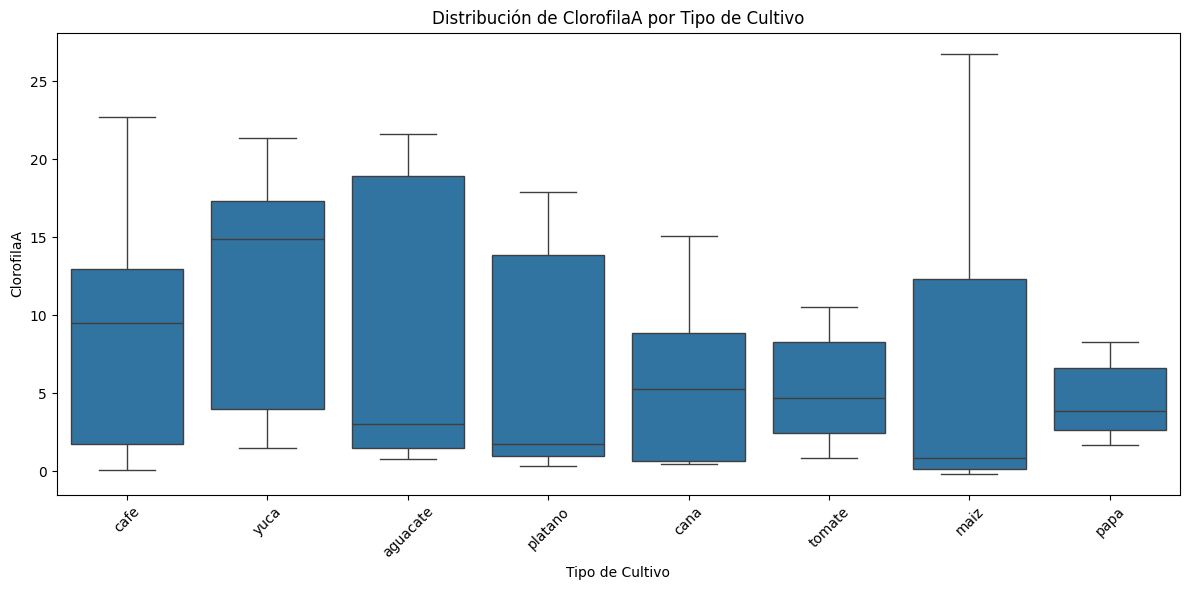

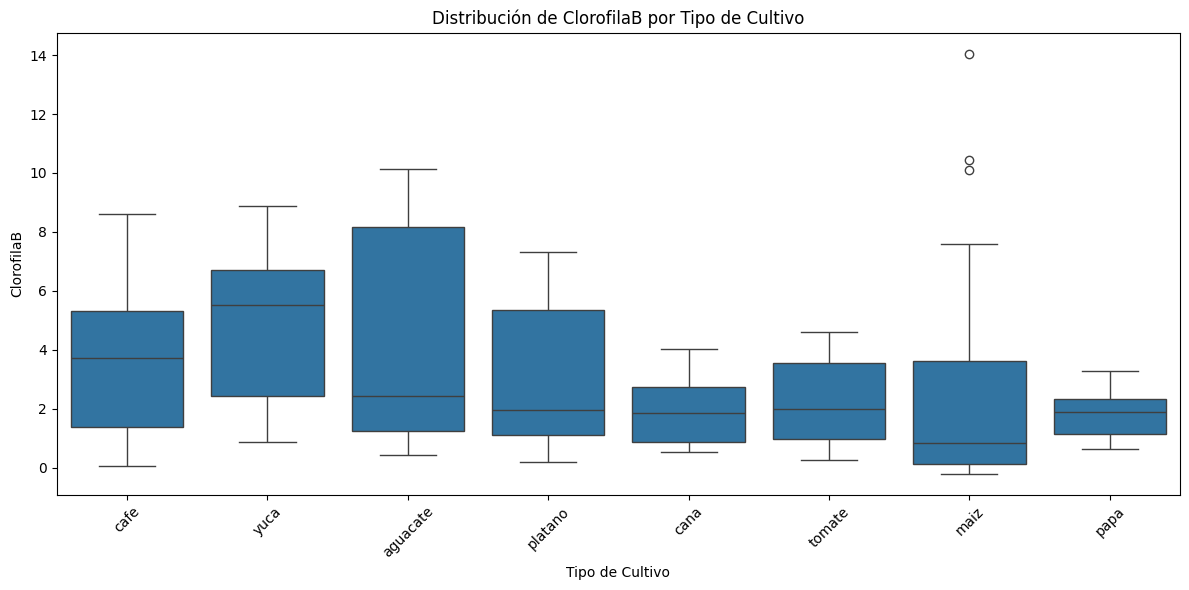

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='CULTIVO', y='ClorofilaA', data=df)
plt.title('Distribución de ClorofilaA por Tipo de Cultivo')
plt.xlabel('Tipo de Cultivo')
plt.ylabel('ClorofilaA')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='CULTIVO', y='ClorofilaB', data=df)
plt.title('Distribución de ClorofilaB por Tipo de Cultivo')
plt.xlabel('Tipo de Cultivo')
plt.ylabel('ClorofilaB')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Análisis de la relación entre 'cultivo' y las variables predictoras

### Subtask:
Explora si las distribuciones o rangos de los índices predictoras varían significativamente entre los diferentes tipos de cultivo.


**Reasoning**:
Identify the numerical predictor columns and create boxplots for each against the 'CULTIVO' column to visualize the distribution across different crop types.



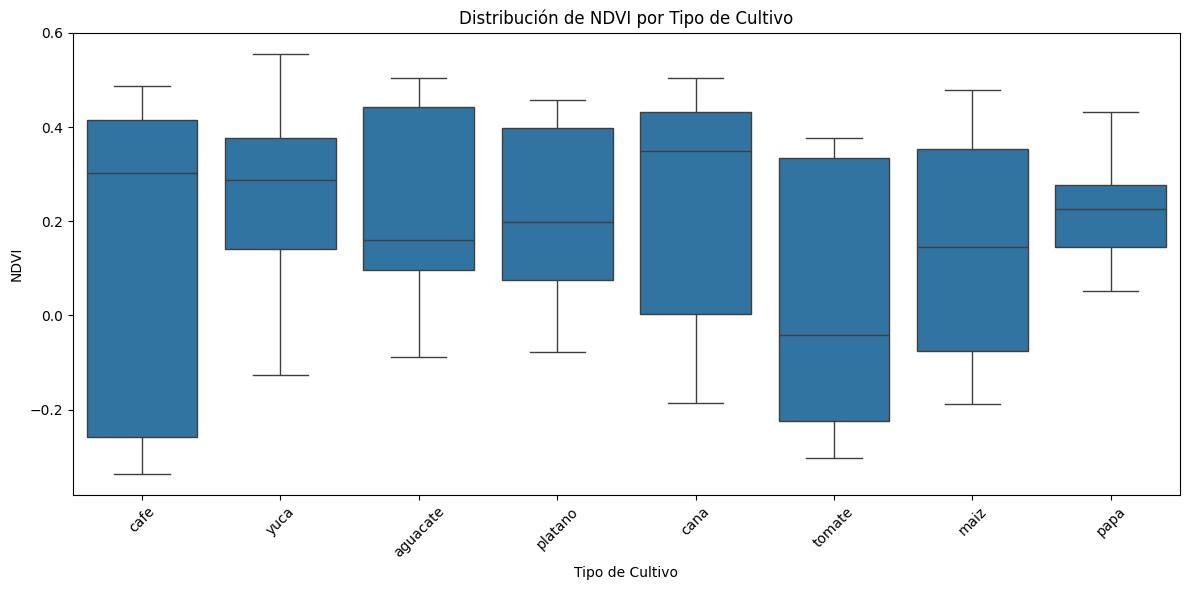

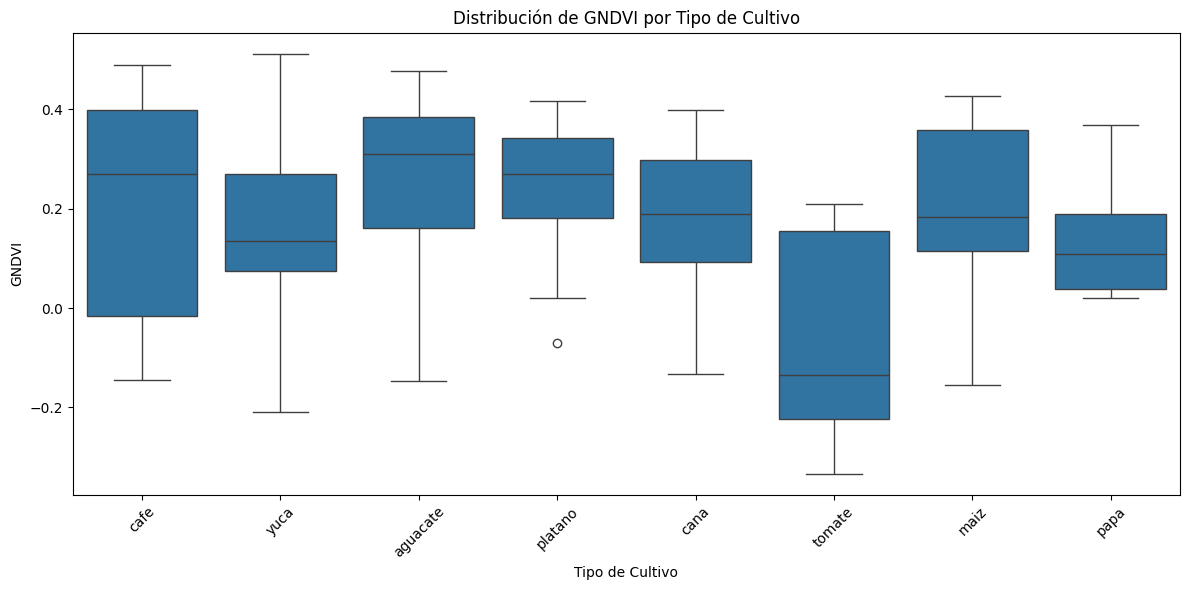

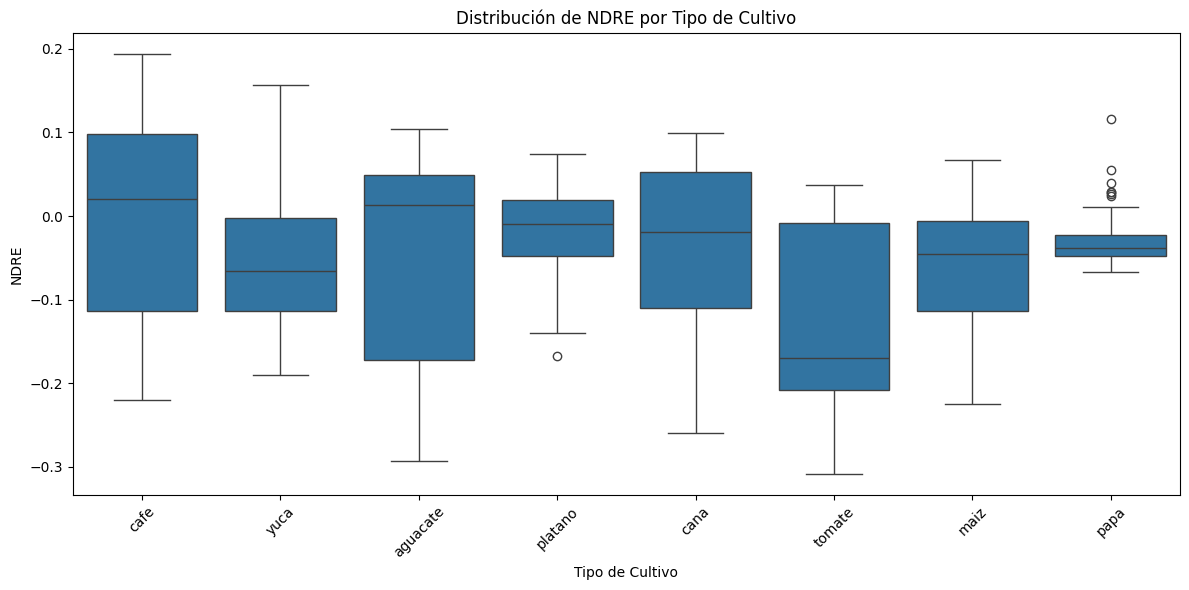

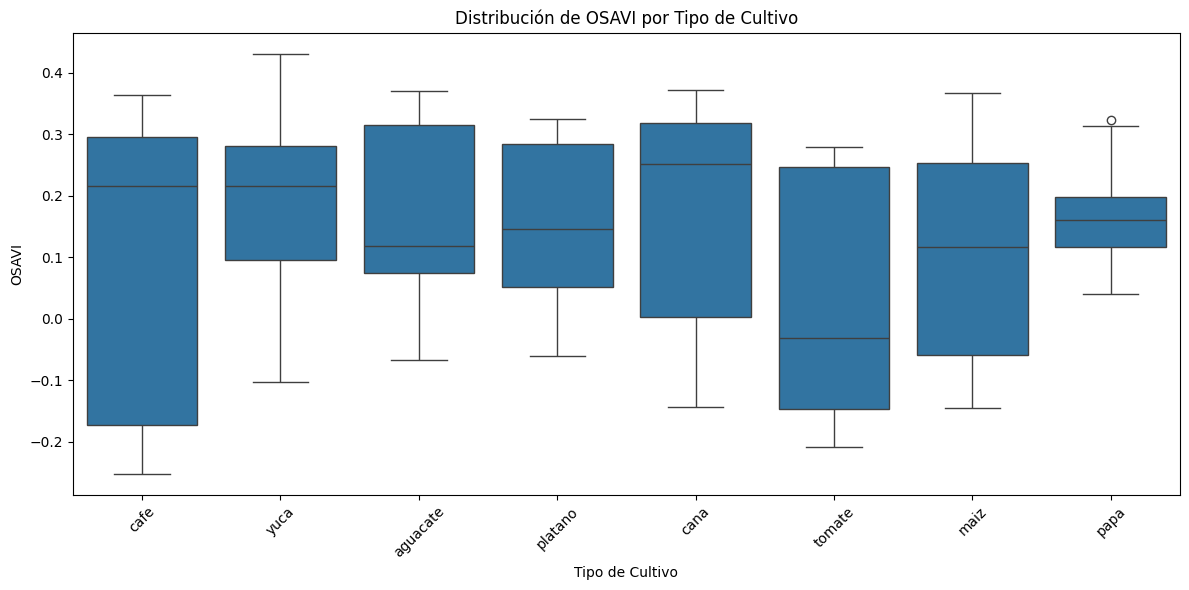

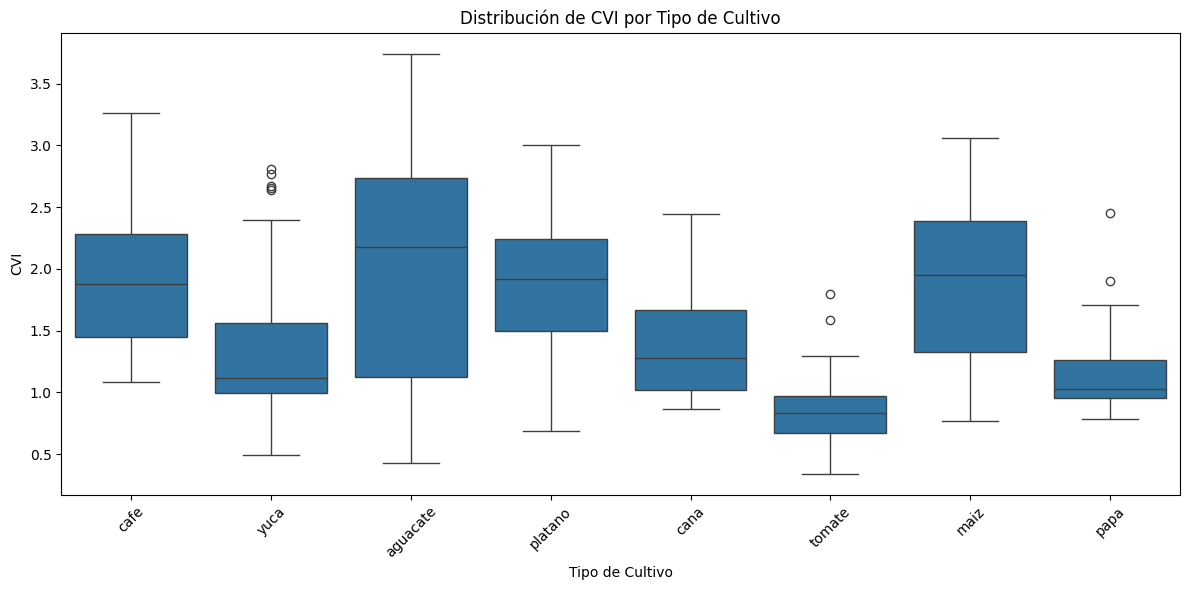

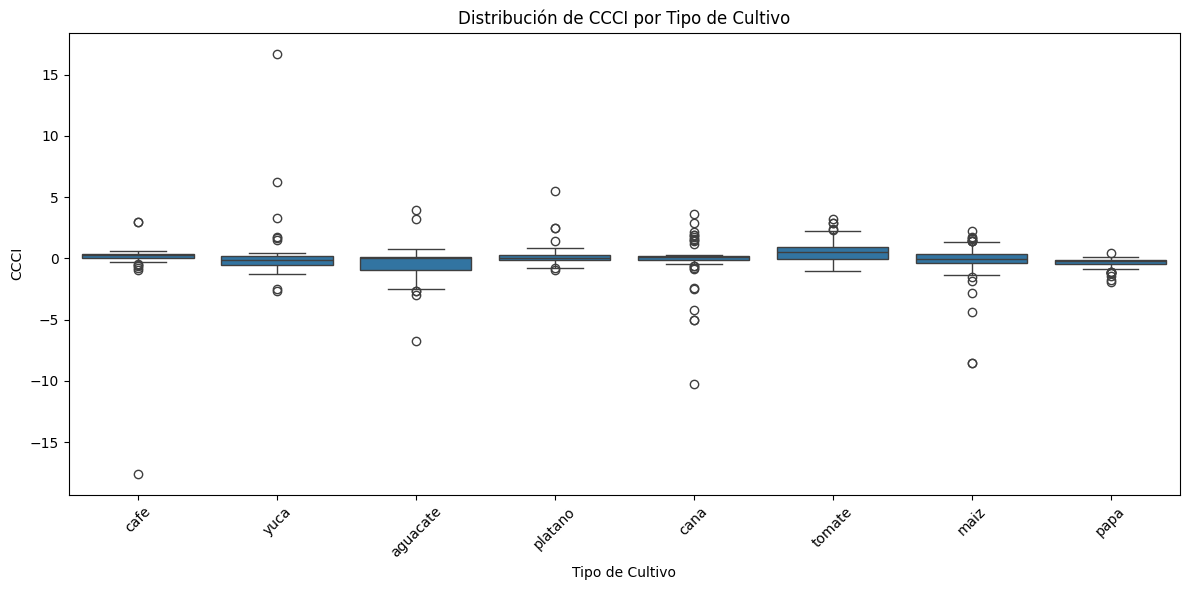

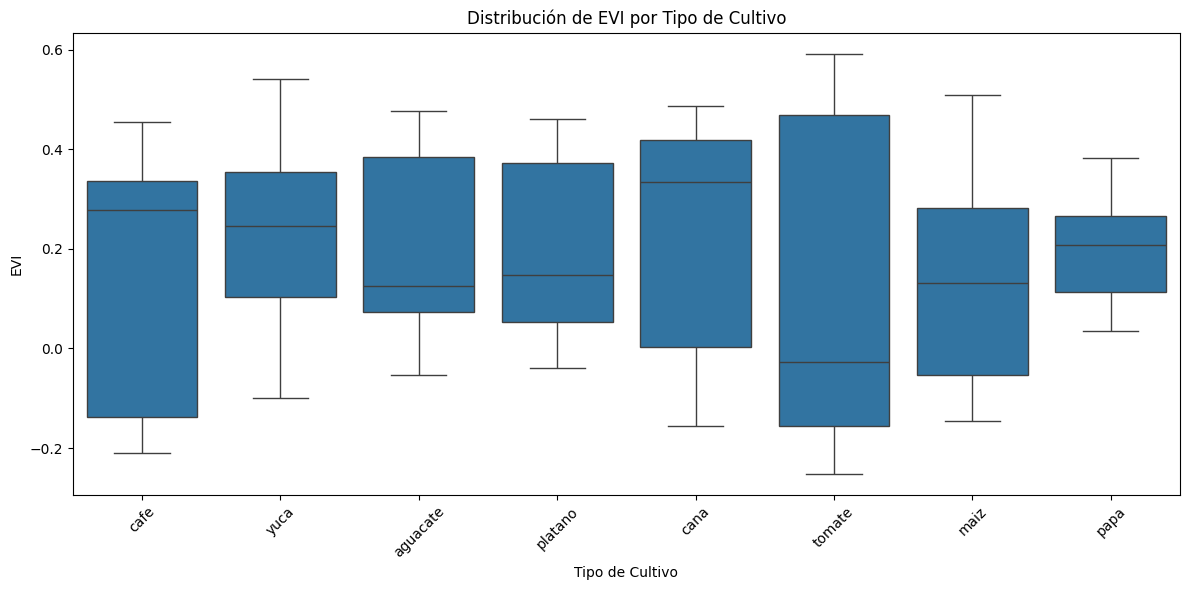

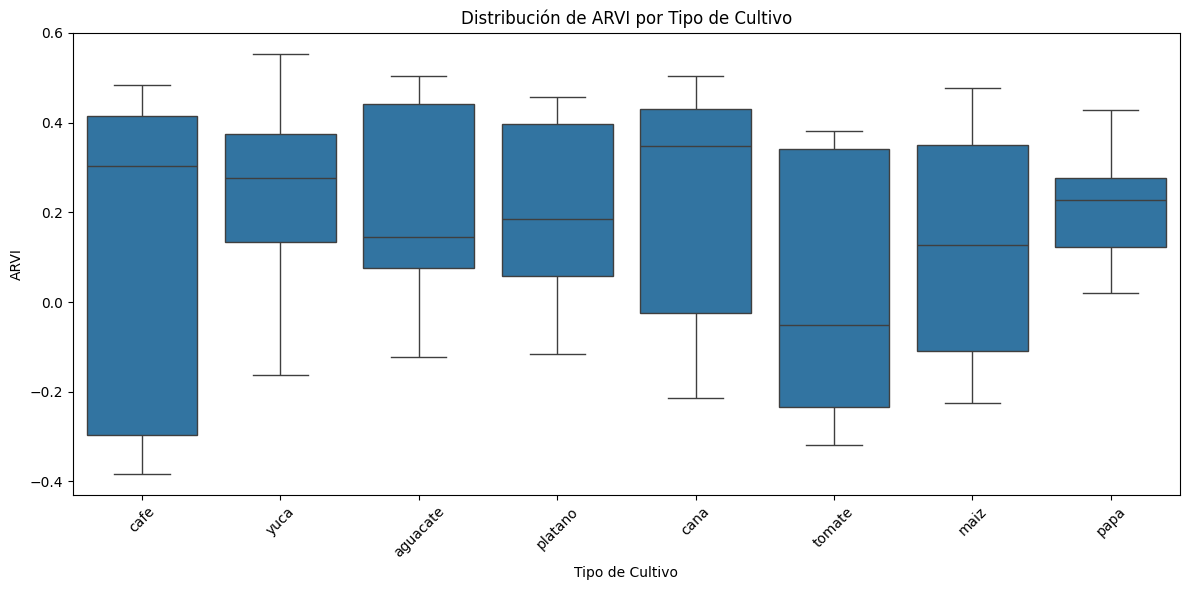

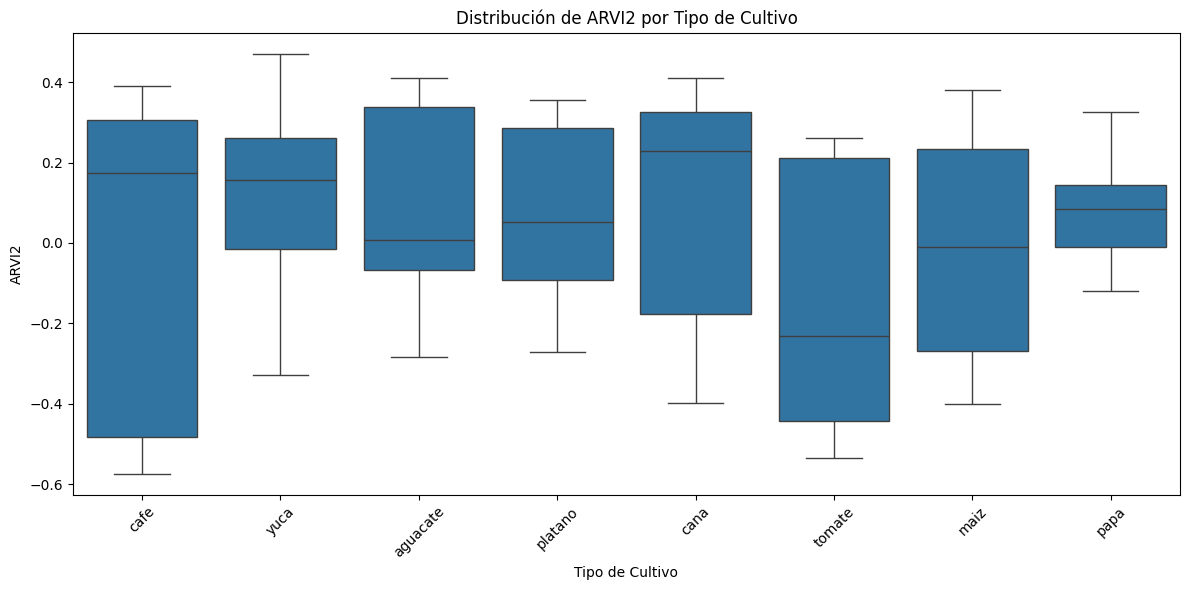

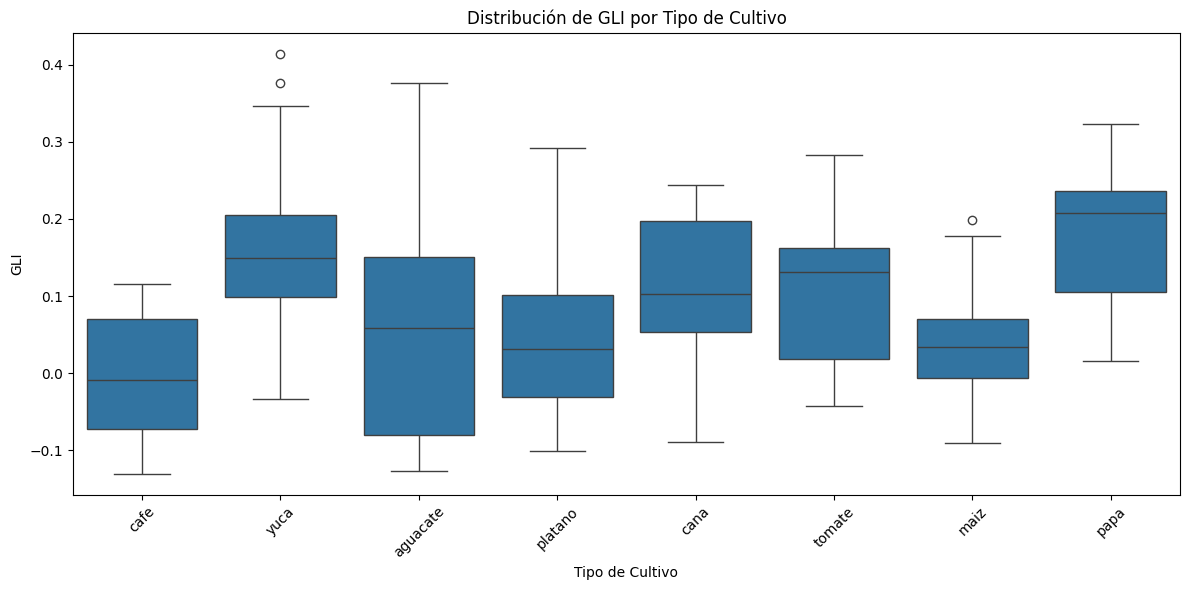

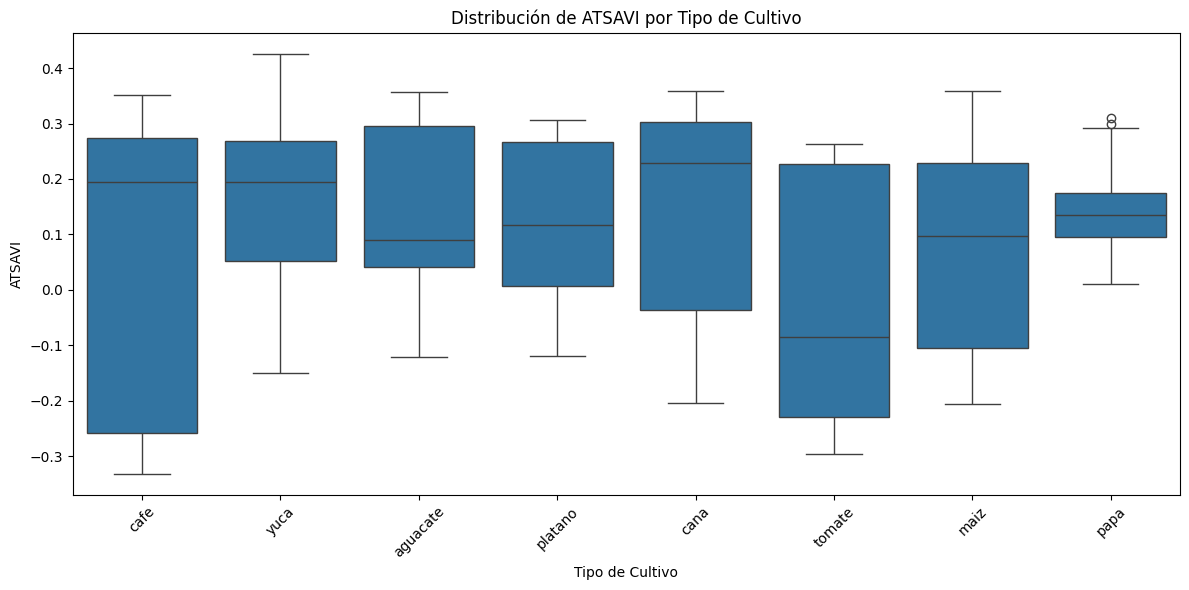

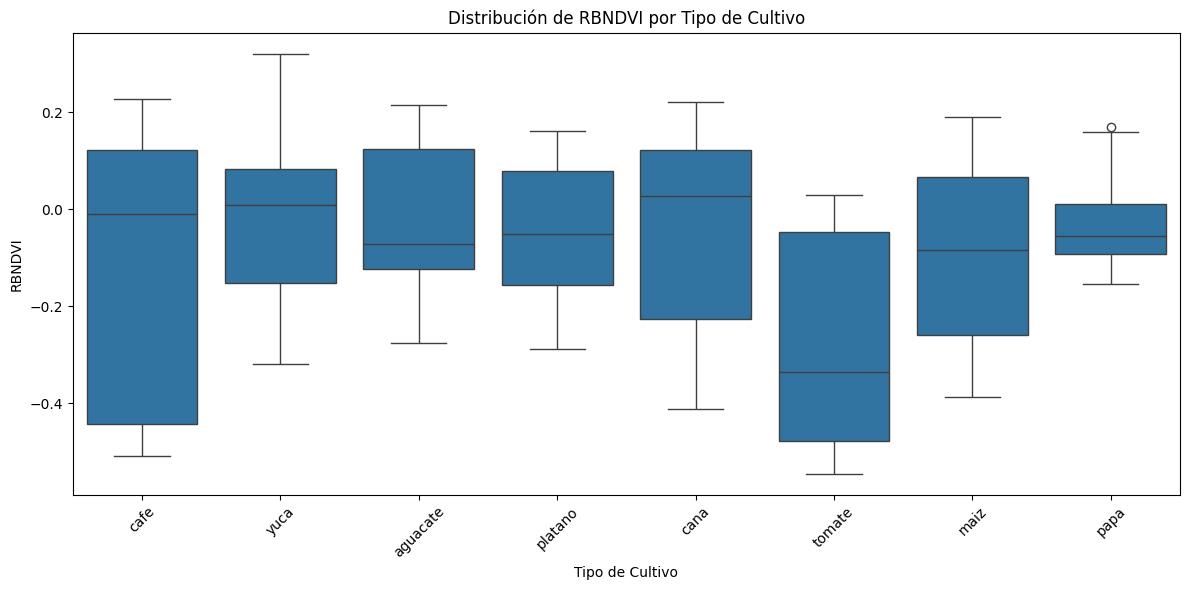

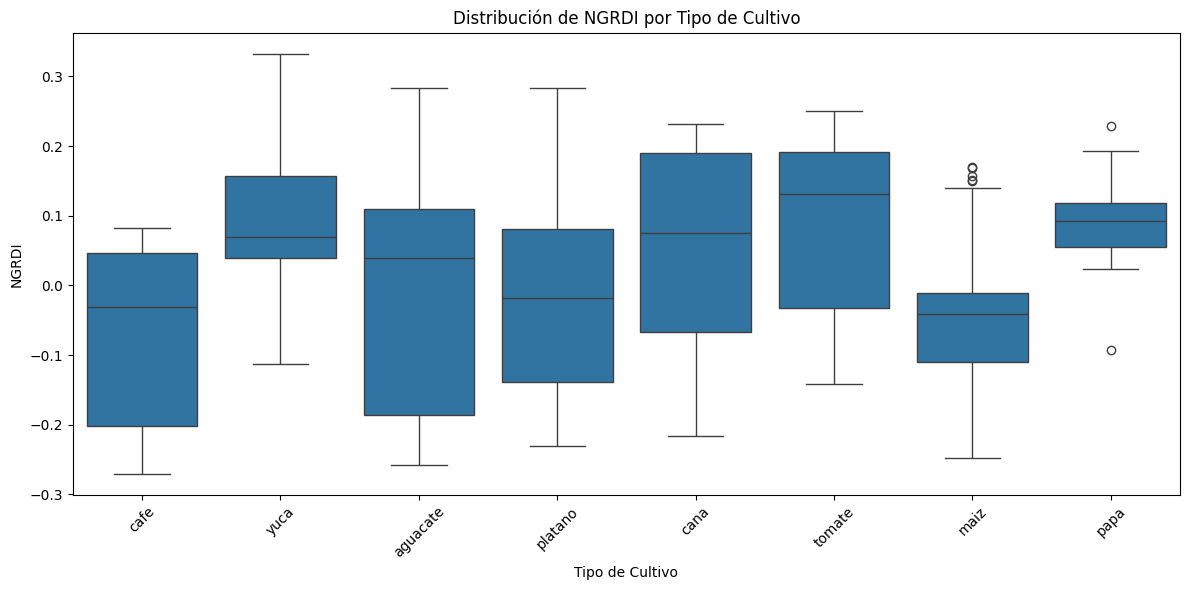

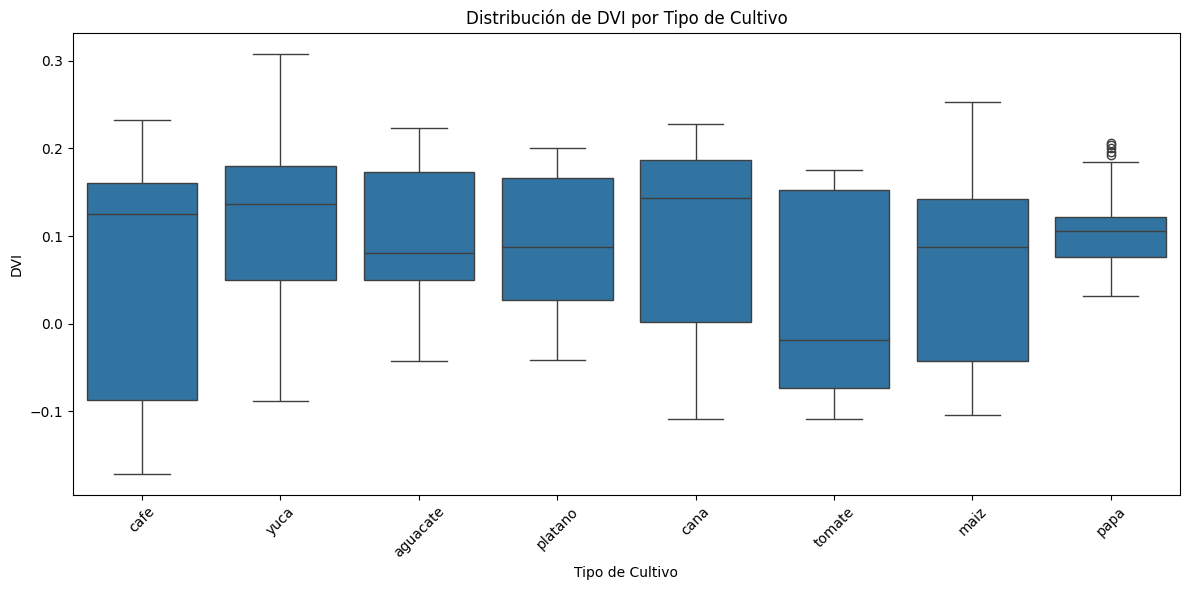

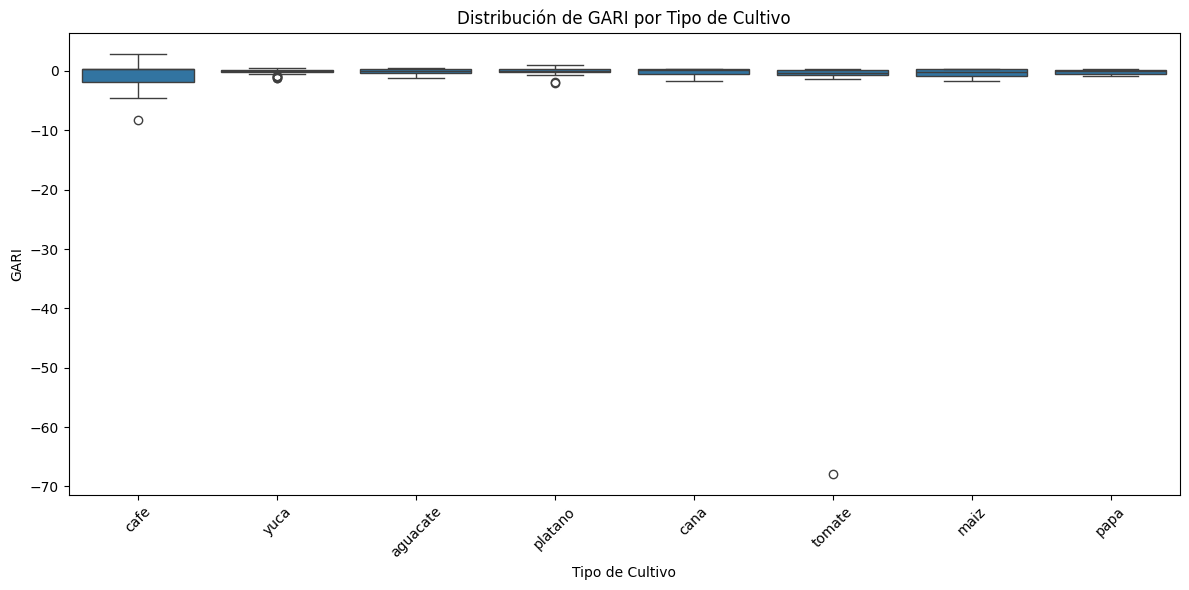

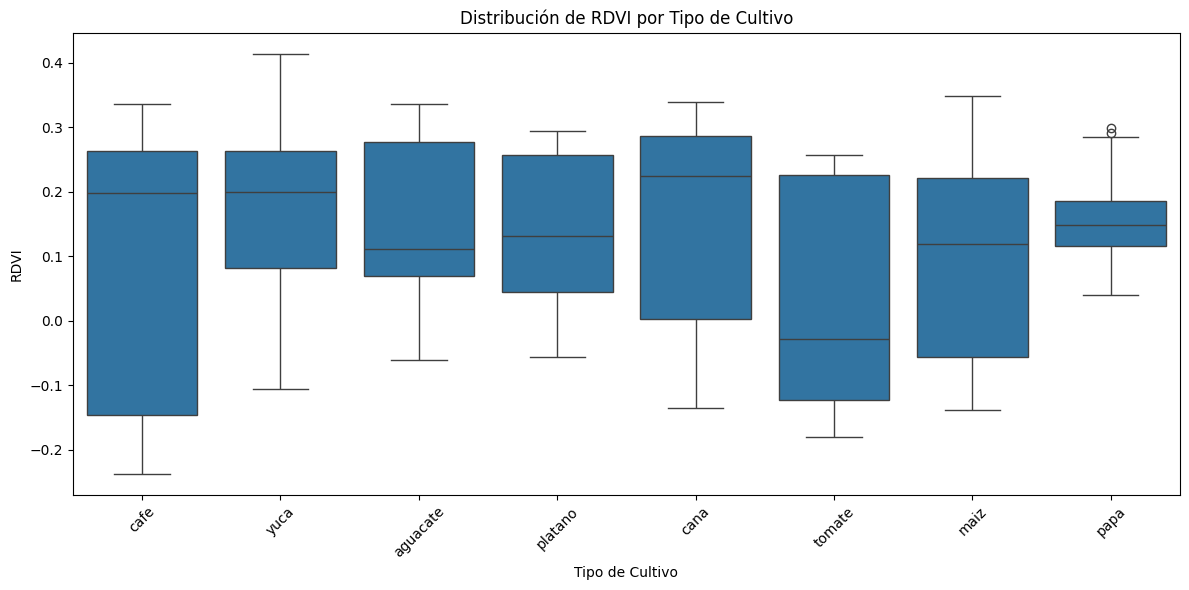

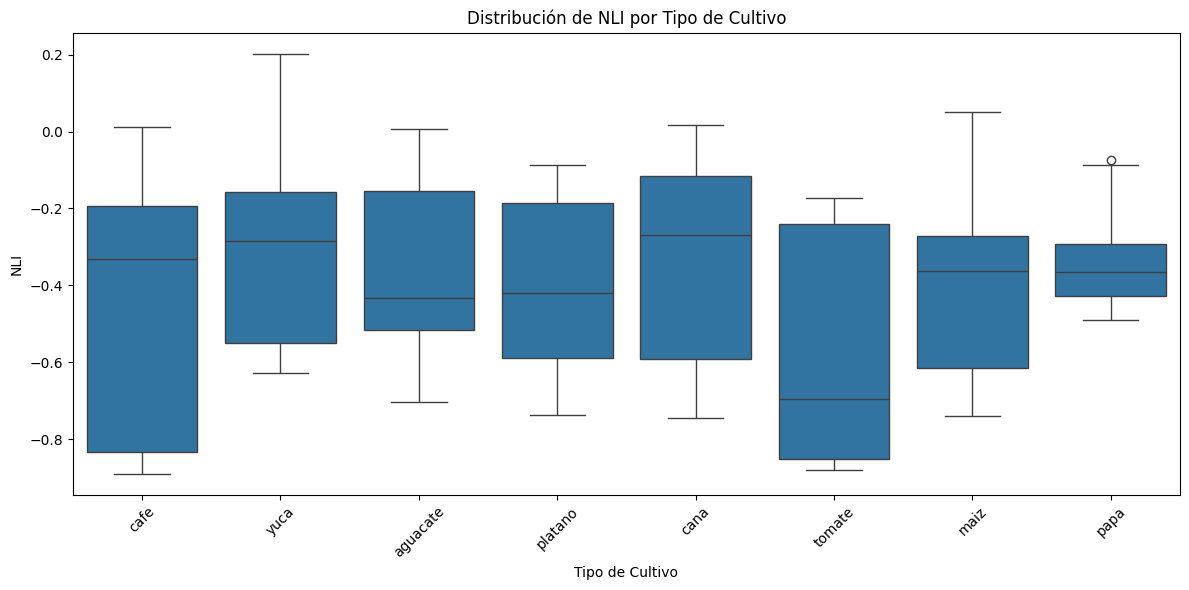

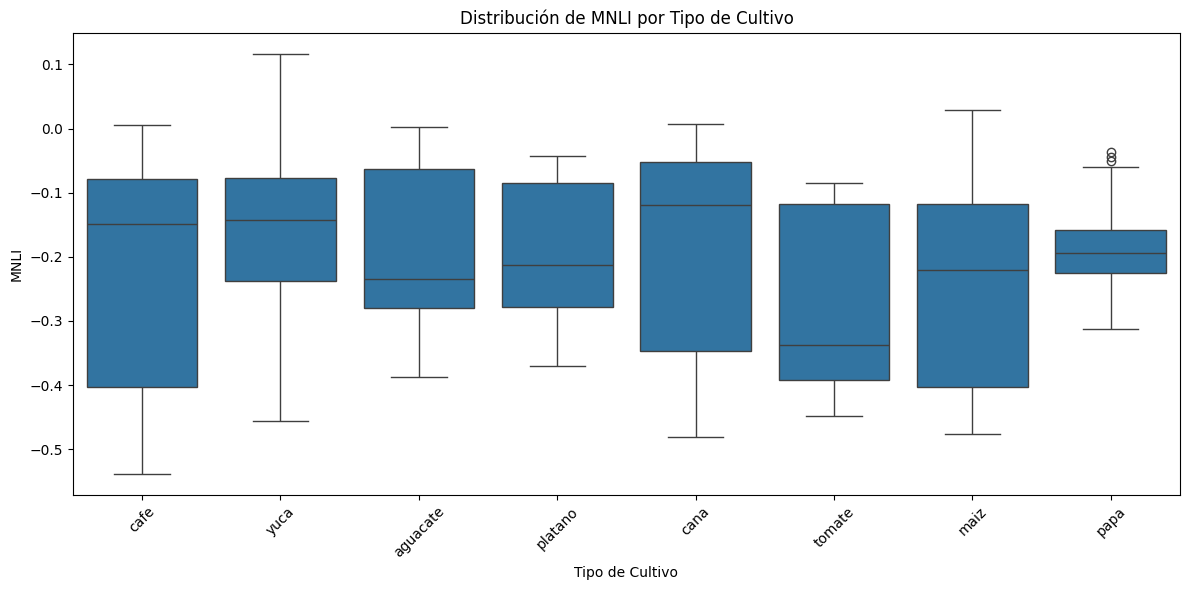

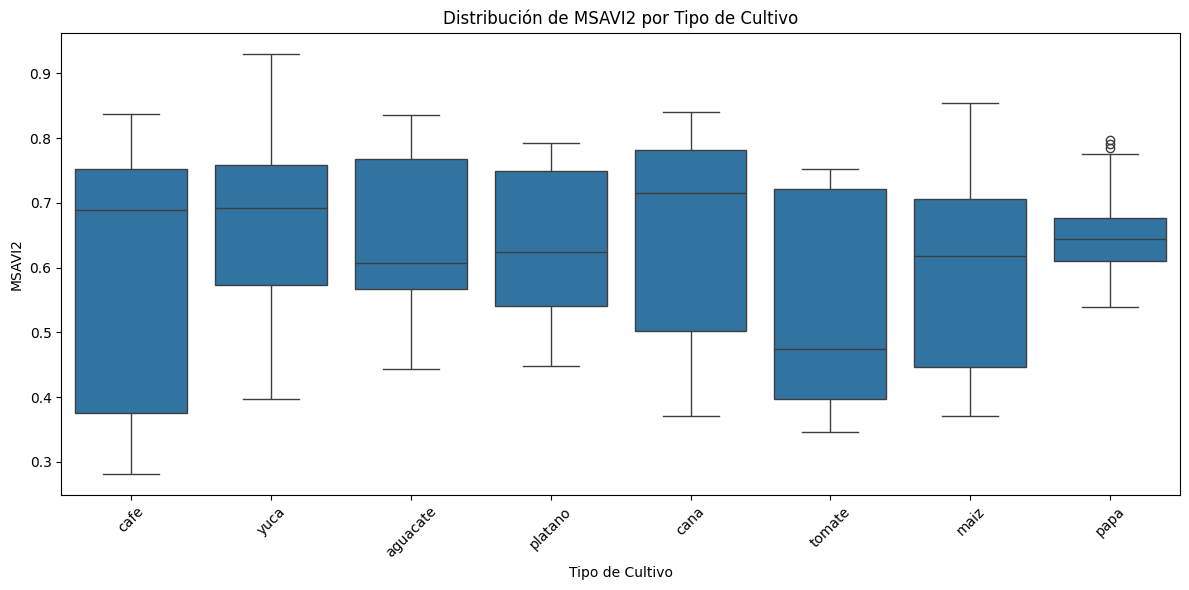

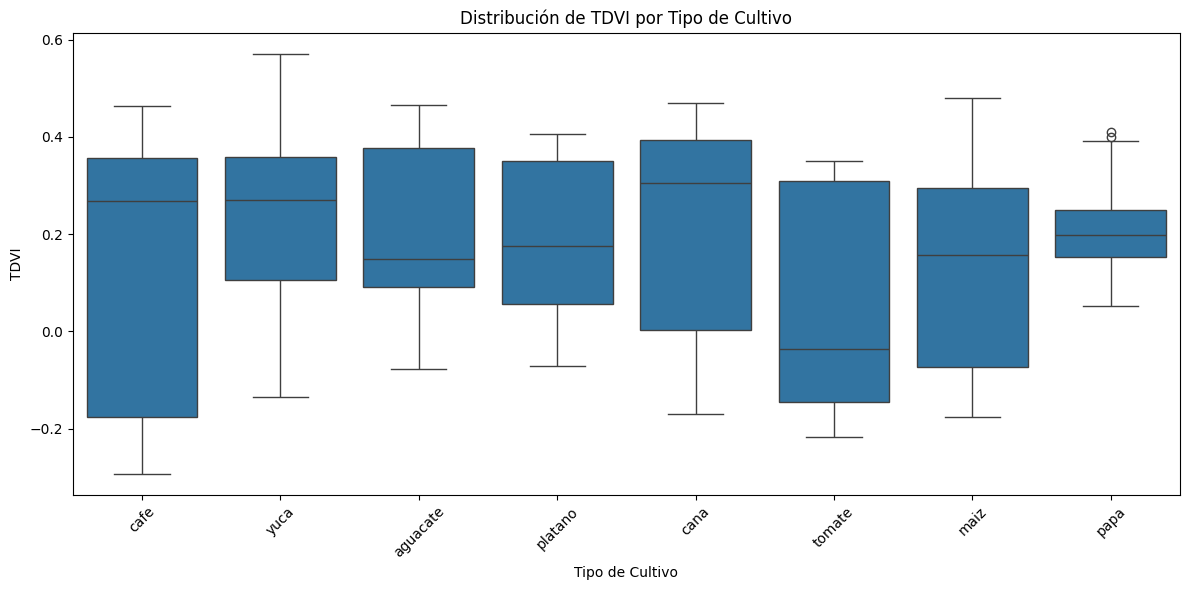

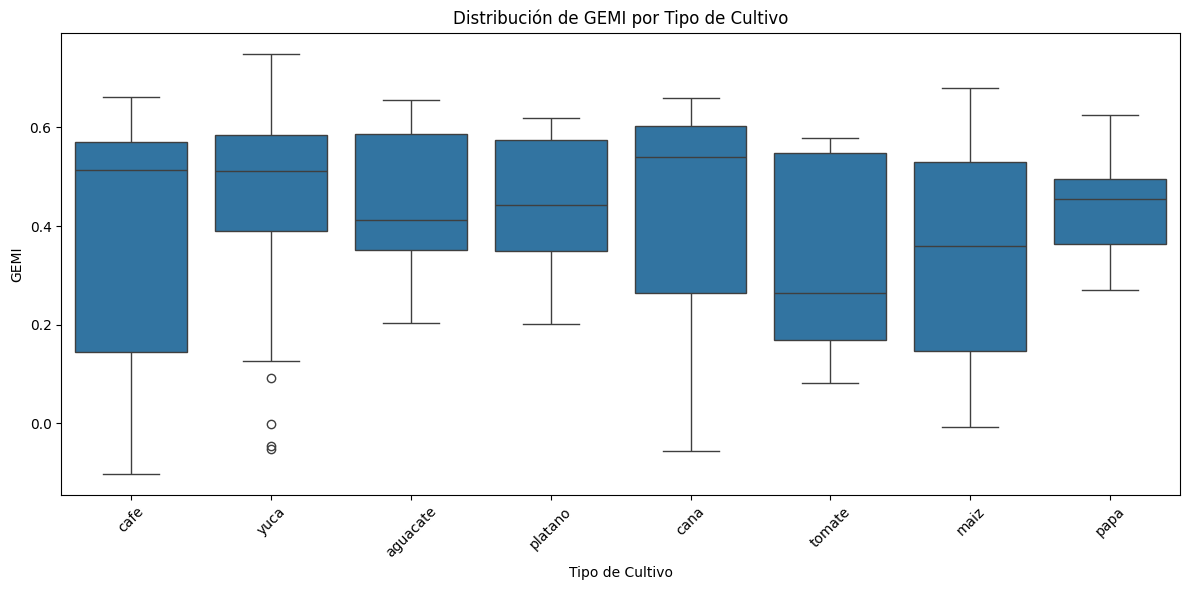

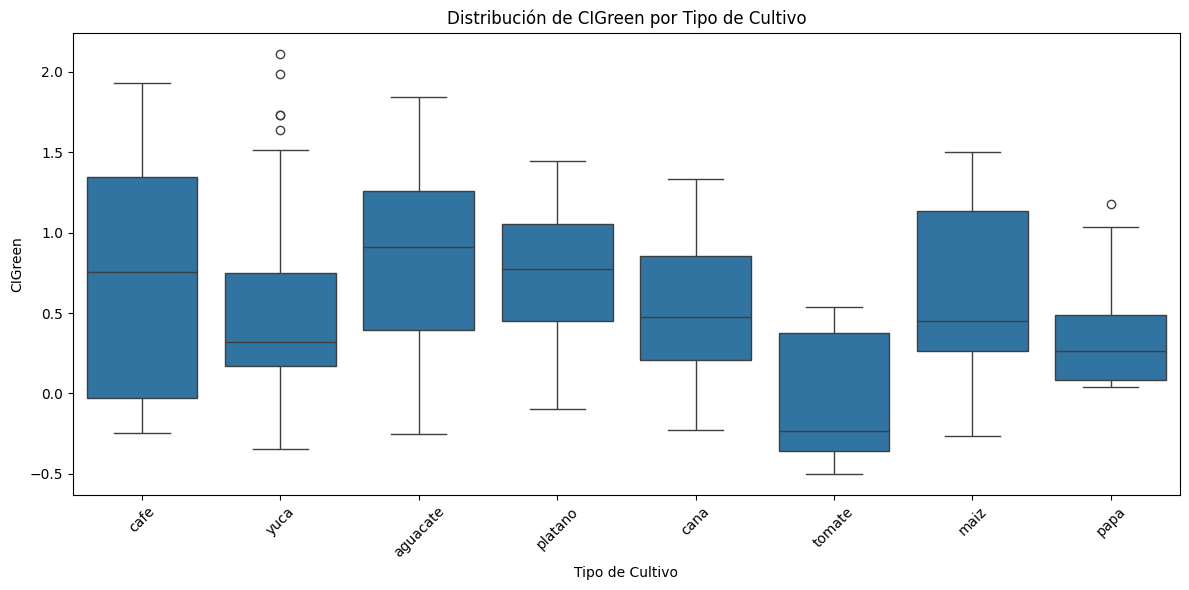

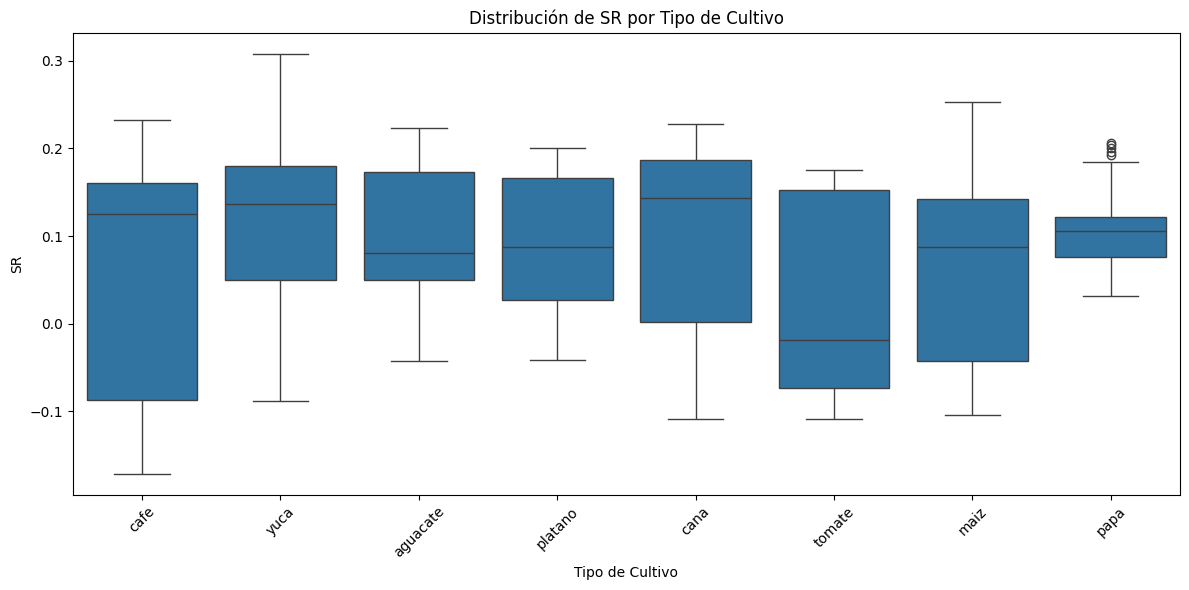

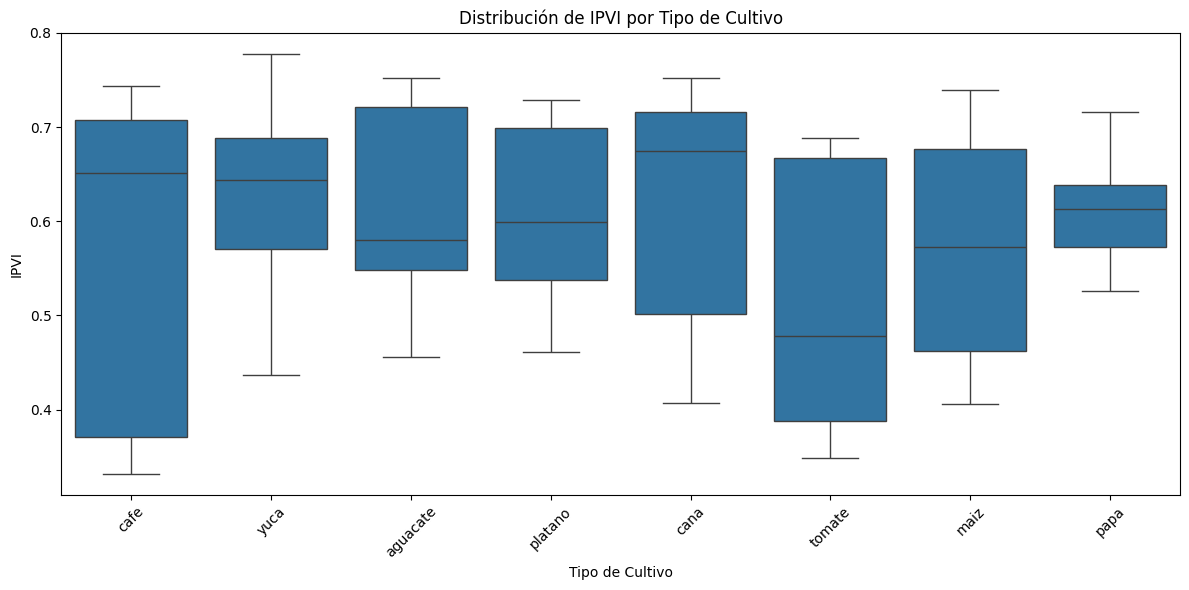

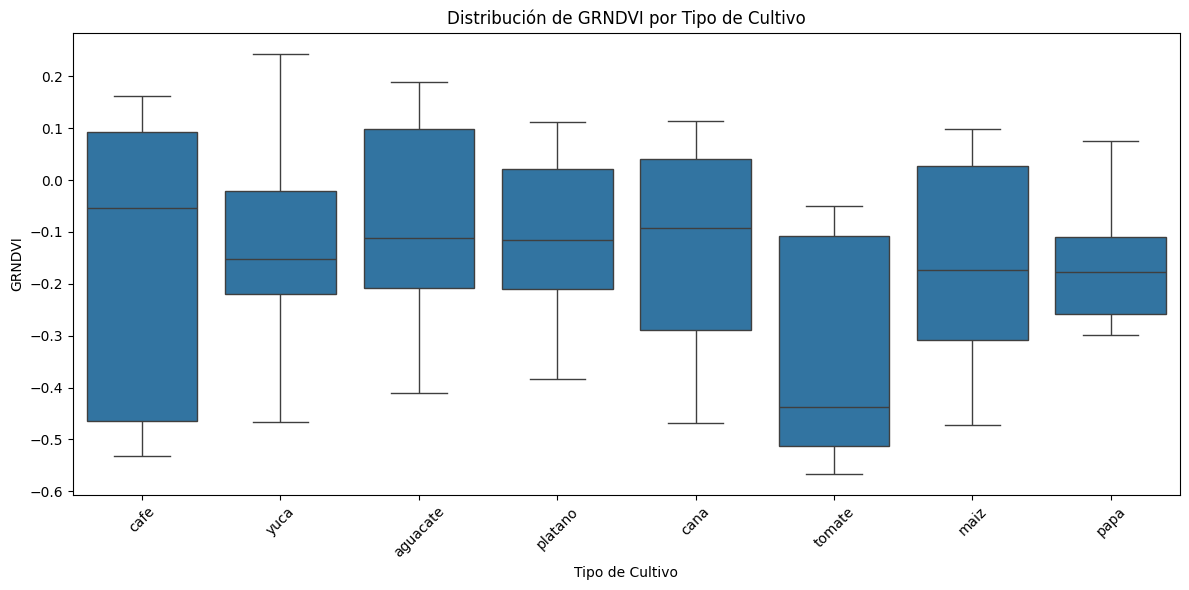

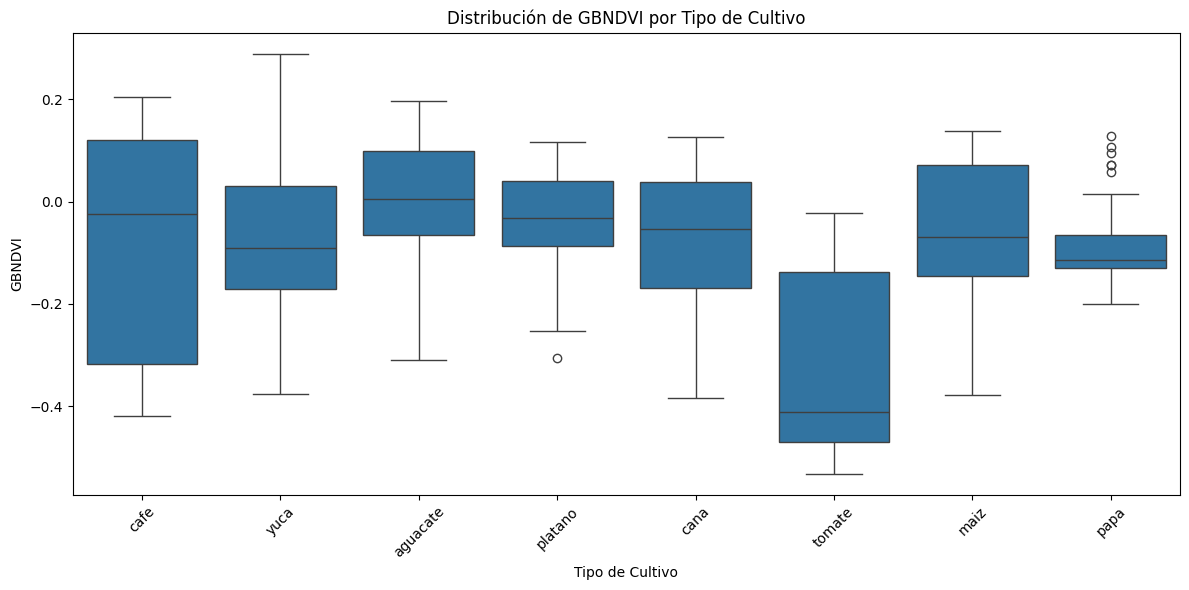

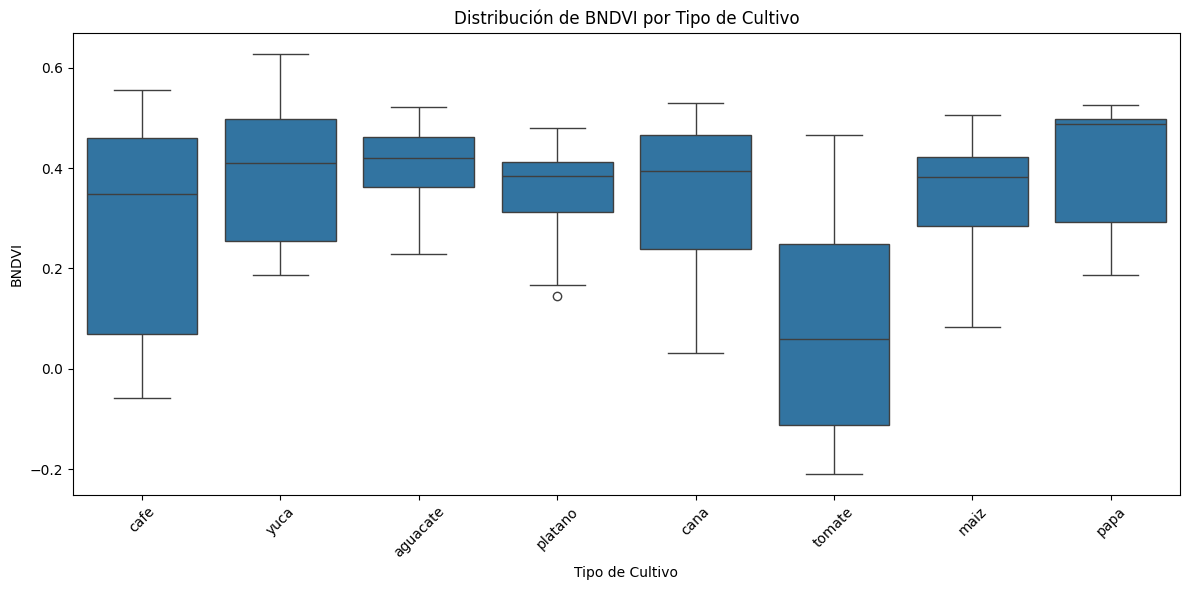

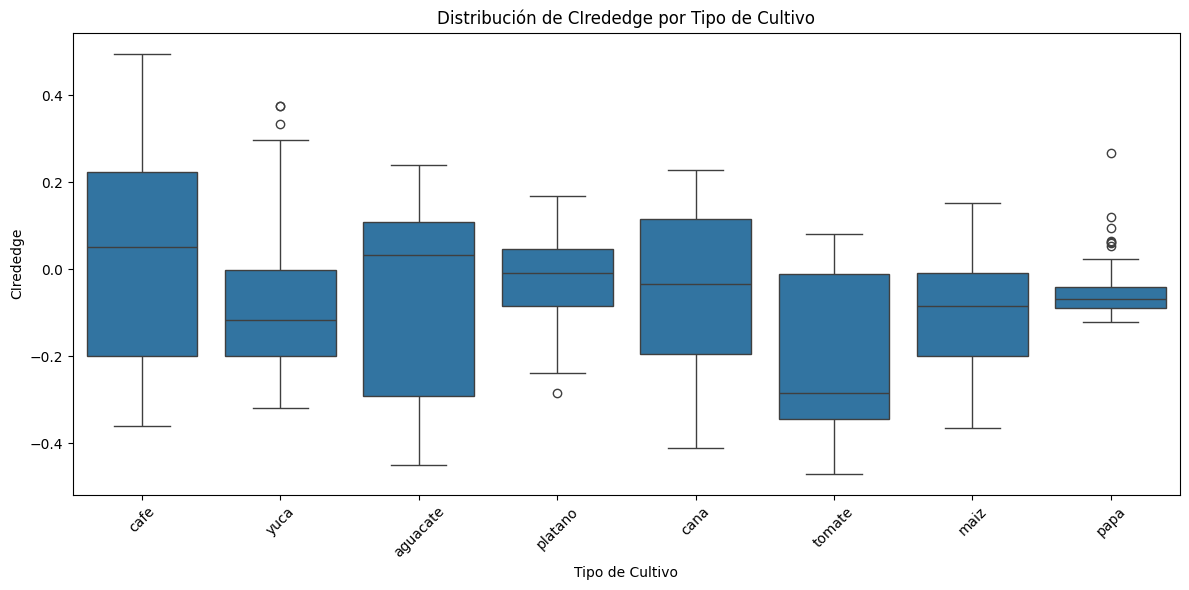

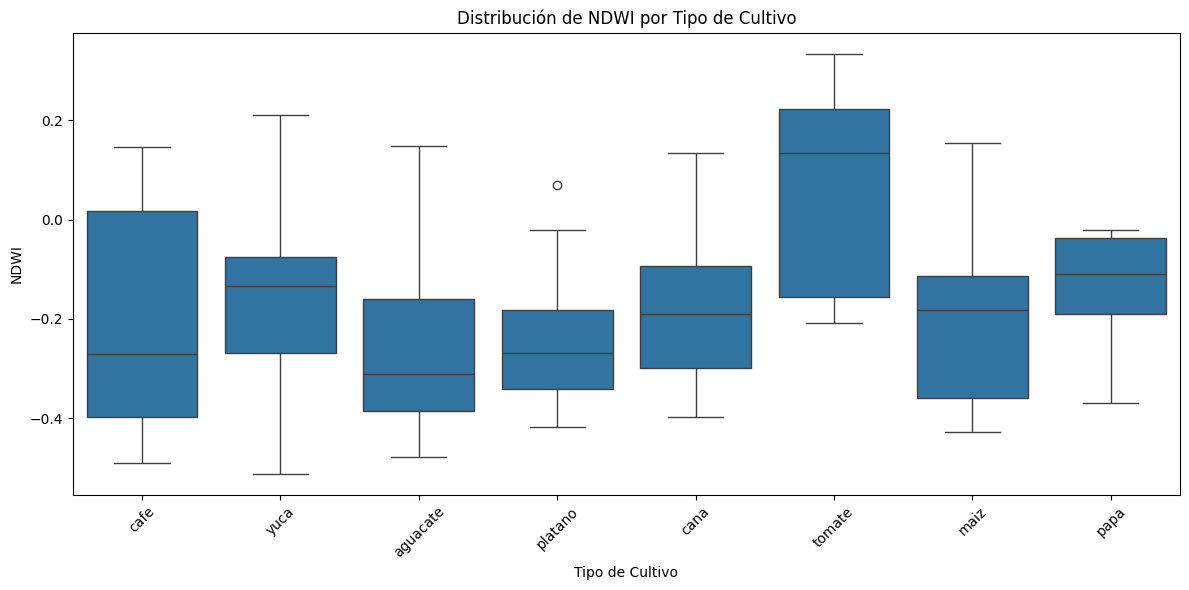

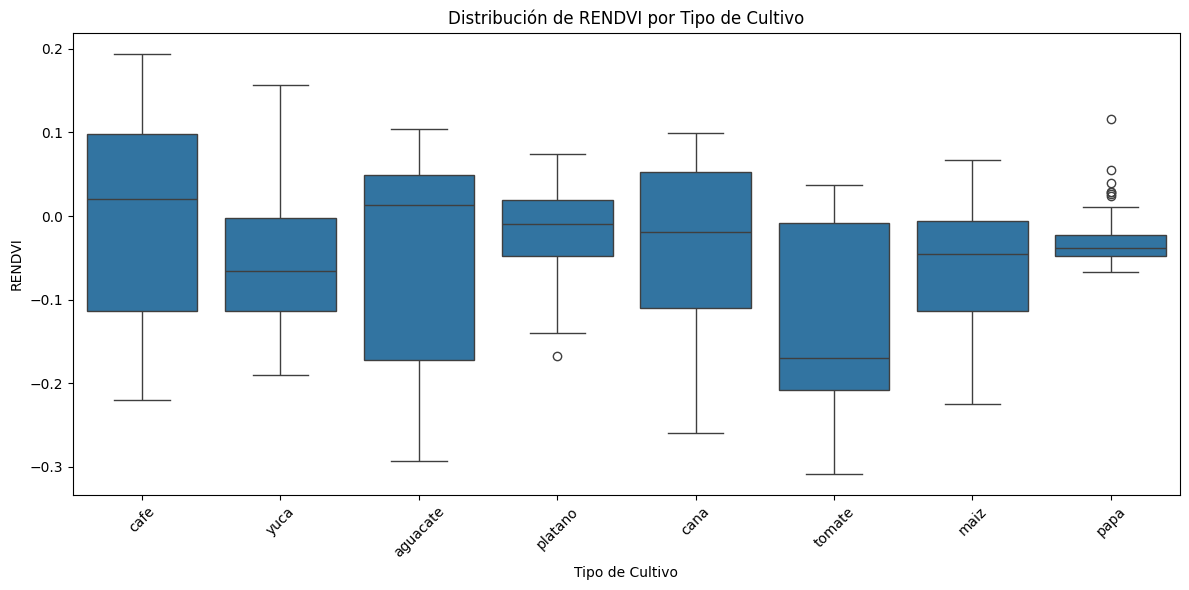

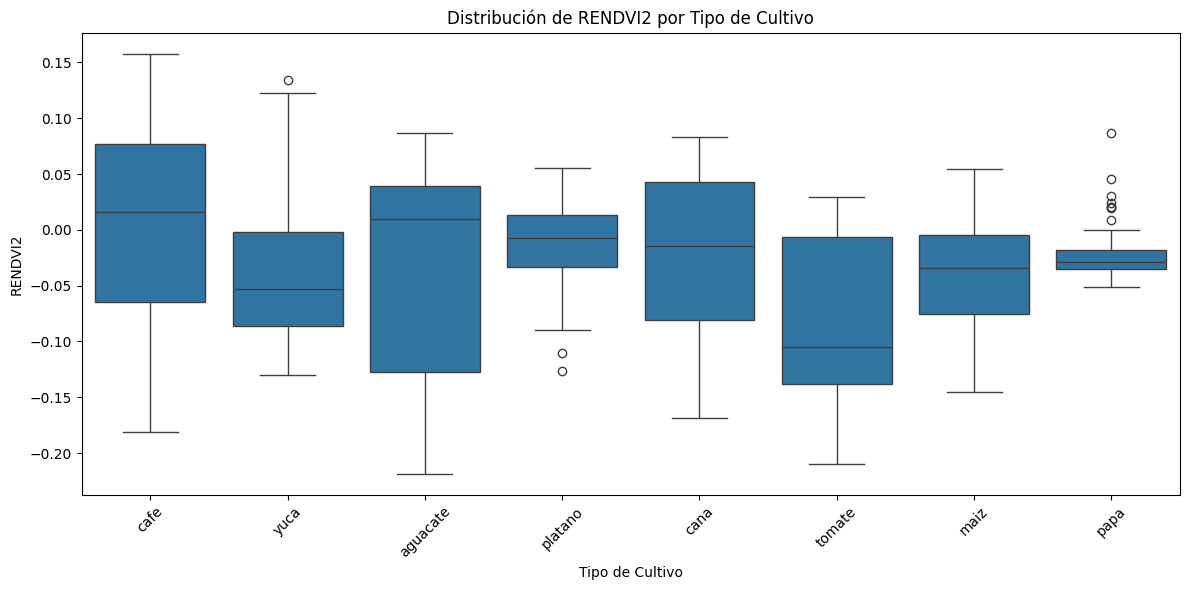

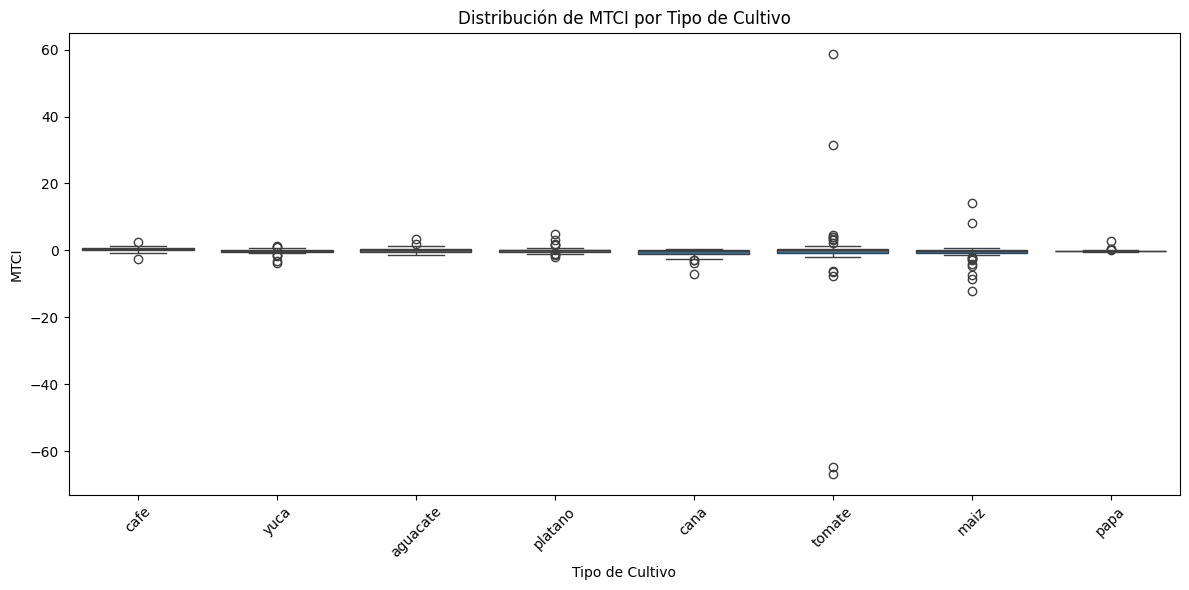

In [ ]:
predictor_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
predictor_cols.remove('ClorofilaA')
predictor_cols.remove('ClorofilaB')

for col in predictor_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='CULTIVO', y=col, data=df)
    plt.title(f'Distribución de {col} por Tipo de Cultivo')
    plt.xlabel('Tipo de Cultivo')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Ajuste de hiperparámetros del modelo mlp

### Subtask:
Experimenta con diferentes configuraciones para la arquitectura de tu red neuronal, como el número de capas, neuronas, tasas de dropout y regularización, para encontrar una combinación que minimice los errores.


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import pandas as pd
import numpy as np

# Seleccionar características y etiquetas
indices_seleccionados_poly = ['GEMI']
X_poly = df[indices_seleccionados_poly]

y_clorofila_a = df.iloc[:, -2]  # Penúltima columna (Clorofila A)
y_clorofila_b = df.iloc[:, -1]  # Última columna (Clorofila B)

# Crear características polinómicas
# Puedes ajustar el grado del polinomio (degree=2 for quadratic, degree=3 for cubic, etc.)
poly_features = PolynomialFeatures(degree=3)
X_poly_transformed = poly_features.fit_transform(X_poly)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_poly, X_test_poly, y_train_a, y_test_a = train_test_split(
    X_poly_transformed, y_clorofila_a, test_size=0.2, random_state=42
)

X_train_poly, X_test_poly, y_train_b, y_test_b = train_test_split(
    X_poly_transformed, y_clorofila_b, test_size=0.2, random_state=42 # Split again for Clorofila B to ensure same split
)

# Entrenar el modelo de regresión polinómica para Clorofila A
model_poly_a = LinearRegression()
model_poly_a.fit(X_train_poly, y_train_a)

# Evaluar el modelo para Clorofila A
y_pred_poly_a = model_poly_a.predict(X_test_poly)
mse_poly_a = mean_squared_error(y_test_a, y_pred_poly_a)
rmse_poly_a = np.sqrt(mse_poly_a)
r2_poly_a = r2_score(y_test_a, y_pred_poly_a)
mape_poly_a = mean_absolute_percentage_error(y_test_a, y_pred_poly_a)


print(f"Regresión Polinómica (Grado 2) para Clorofila A (GEMI como predictor):")
print(f"MSE: {mse_poly_a:.4f}")
print(f"RMSE: {rmse_poly_a:.4f}")
print(f"R²: {r2_poly_a:.4f}")
print(f"MAPE: {mape_poly_a*100:.2f}%")


# Entrenar el modelo de regresión polinómica para Clorofila B
model_poly_b = LinearRegression()
model_poly_b.fit(X_train_poly, y_train_b)

# Evaluar el modelo para Clorofila B
y_pred_poly_b = model_poly_b.predict(X_test_poly)
mse_poly_b = mean_squared_error(y_test_b, y_pred_poly_b)
rmse_poly_b = np.sqrt(mse_poly_b)
r2_poly_b = r2_score(y_test_b, y_pred_poly_b)
mape_poly_b = mean_absolute_percentage_error(y_test_b, y_pred_poly_b)


print(f"\nRegresión Polinómica (Grado 2) para Clorofila B (GEMI como predictor):")
print(f"MSE: {mse_poly_b:.4f}")
print(f"RMSE: {rmse_poly_b:.4f}")
print(f"R²: {r2_poly_b:.4f}")
print(f"MAPE: {mape_poly_b*100:.2f}%")

Regresión Polinómica (Grado 2) para Clorofila A (GEMI como predictor):
MSE: 25.4111
RMSE: 5.0409
R²: 0.4161
MAPE: 112.33%

Regresión Polinómica (Grado 2) para Clorofila B (GEMI como predictor):
MSE: 4.1176
RMSE: 2.0292
R²: 0.2905
MAPE: 75.19%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


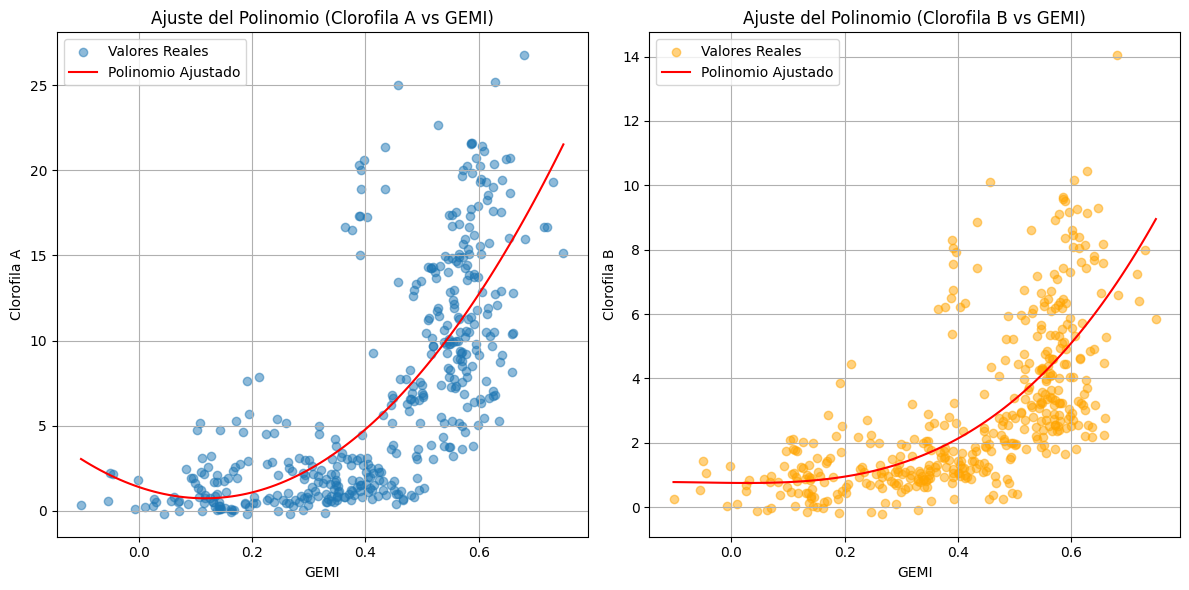

In [ ]:
# Para visualizar la línea del polinomio ajustado
# Creamos un rango de valores para GEMI
import numpy as np
import matplotlib.pyplot as plt

# Asegúrate de que X_poly, poly_features, model_poly_a, y model_poly_b estén definidos
# en celdas anteriores y ejecutadas.

gemi_range = np.linspace(df['GEMI'].min(), df['GEMI'].max(), 100).reshape(-1, 1)

# Transformamos este rango usando las mismas características polinómicas
# Asegúrate de que poly_features fue ajustado previamente en X_poly
gemi_range_transformed = poly_features.transform(gemi_range)

# Predecimos los valores de ClorofilaA y ClorofilaB para este rango
predicted_clorofila_a = model_poly_a.predict(gemi_range_transformed)
predicted_clorofila_b = model_poly_b.predict(gemi_range_transformed)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['GEMI'], df['ClorofilaA'], alpha=0.5, label='Valores Reales')
plt.plot(gemi_range, predicted_clorofila_a, color='red', label='Polinomio Ajustado')
plt.title('Ajuste del Polinomio (Clorofila A vs GEMI)')
plt.xlabel('GEMI')
plt.ylabel('Clorofila A')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(df['GEMI'], df['ClorofilaB'], alpha=0.5, label='Valores Reales', color='orange')
plt.plot(gemi_range, predicted_clorofila_b, color='red', label='Polinomio Ajustado')
plt.title('Ajuste del Polinomio (Clorofila B vs GEMI)')
plt.xlabel('GEMI')
plt.ylabel('Clorofila B')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Residuales de Clorofila A:
  Media: 0.2050
  Desviación Estándar: 5.0368

Residuales de Clorofila B:
  Media: 0.0440
  Desviación Estándar: 2.0287


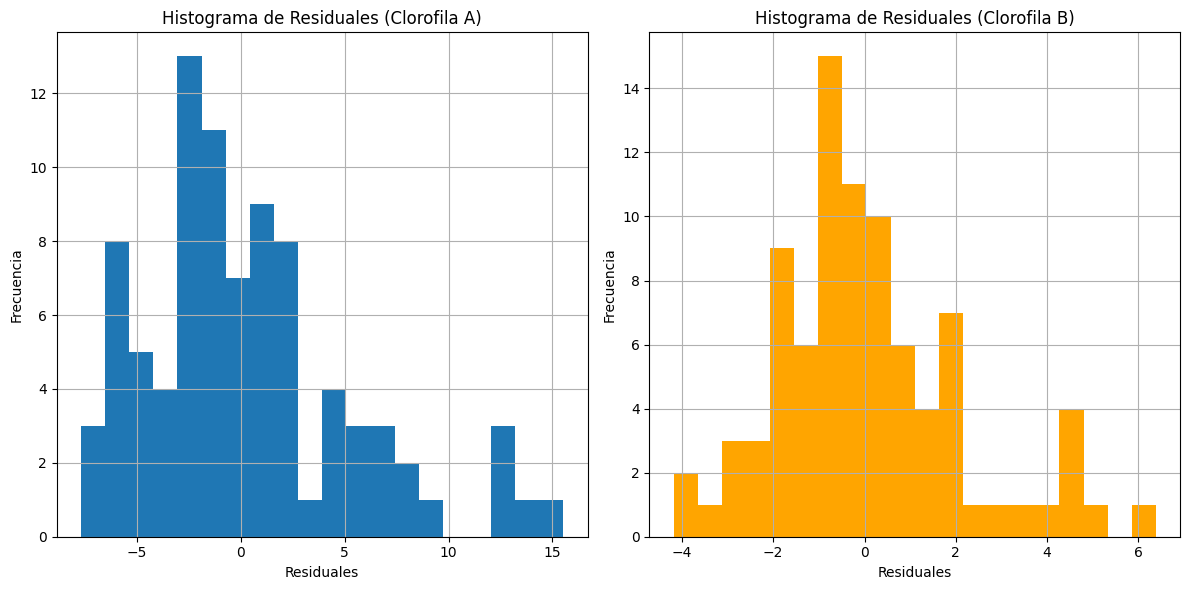

In [ ]:
# Calcular los residuales
residuals_a = y_test_a - y_pred_poly_a
residuals_b = y_test_b - y_pred_poly_b

# Histograma de residuales para Clorofila A
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(residuals_a, bins=20)
plt.title('Histograma de Residuales (Clorofila A)')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.grid(True)

# Media y desviación estándar de residuales para Clorofila A
mean_residuals_a = np.mean(residuals_a)
std_residuals_a = np.std(residuals_a)
print(f"Residuales de Clorofila A:")
print(f"  Media: {mean_residuals_a:.4f}")
print(f"  Desviación Estándar: {std_residuals_a:.4f}")

# Histograma de residuales para Clorofila B
plt.subplot(1, 2, 2)
plt.hist(residuals_b, bins=20, color='orange')
plt.title('Histograma de Residuales (Clorofila B)')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.grid(True)

# Media y desviación estándar de residuales para Clorofila B
mean_residuals_b = np.mean(residuals_b)
std_residuals_b = np.std(residuals_b)
print(f"\nResiduales de Clorofila B:")
print(f"  Media: {mean_residuals_b:.4f}")
print(f"  Desviación Estándar: {std_residuals_b:.4f}")

plt.tight_layout()
plt.show()